## <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Assignment 4: Term Deposits Subscription Prediction </span>

&nbsp;

<p align="center" style="font-family: Arial;color:#0e92ea;font-size:1em;">
Care Bank ran a campaign for term-deposit subscriptions last year for its existing customers that showed a healthy conversion rate of over 12%. The bank is interested in a term deposit subscription because it gets good returns from a term deposit than a savings account as the customer is deprived of the rights to access the money prior to the maturity unless the customer is ready to compensate the bank. Banks can use that money to invest in other markets for better returns. Now, the bank is planning to launch a new campaign again but this time bank wants to utilize data available from previous campaigns, and also bank wants to automate this process with better target marketing to increase the success ratio with a minimal budget.
</p>

<p align="center" style="font-family: Arial;color:#0e92ea;font-size:1em;">
The objective of this project is to build a model that will help the marketing department, in the next campaign, to identify the customers who have a higher probability of subscribing to the term deposit. This will increase the success ratio while at the same time reduce the cost of the campaign.
</p>

##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Data Dictionary:</span>
<ol style="font-family: Arial;color:#0e92ea;font-size:1em;">
    <li>age: Age of customer</li>
    <li>job: Type of job</li>
    <li>marital: Marital status of customer</li>
    <li>education: Education of customer</li>
    <li>default: has credit in default?</li>
    <li>housing: has housing loan?</li>
    <li>loan: has a personal loan?</li>
    <li>balance: balance in the account</li>
    <li>contact: contact communication type</li>
    <li>month: last contact month of the year</li>
    <li>day_of_week: last contact day of the week</li>
    <li>campaign: number of contacts performed during this campaign and for this client</li>
    <li>pdays: number of days that passed by after the client was last contacted from a previous campaign</li>
    <li>previous: number of contacts performed before this campaign and for this client</li>
    <li>poutcome: outcome of the previous marketing campaign</li>
    <li>Output variable- Target: has the client subscribed to a term deposit?</li>
</ol>

##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Contents:</span>

<ol style="font-family: Arial;color:#0e92ea;font-size:1em;">
    <li>Exploratory Data Analysis and Data Processing</li>
    <li>Recommendations</li>
</ol>

In [1]:
# To help with reading and manipulation of data
import numpy as np
import pandas as pd
import pprint

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

# To split the data
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

# to use standard scaler
from sklearn.preprocessing import StandardScaler

# To impute missing values
from sklearn.impute import SimpleImputer

# To build a Random forest classifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# To tune a model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")
main_data     = pd.read_csv('Term Deposits Subscription Prediction - DATASET.csv')
TARGET_COLUMN = 'Target'

# Exploratory Data Analysis and Insights:

In [2]:
main_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
default_color_palette       = ["#f44336", "#e81e63", "#9c27b0", "#673ab7", "#3f51b5", "#2196f3", "#03a9f4", "#00bcd4","#009688","#4caf50","#8bc34a","#cddc39","#ffeb3b","#ffc107","#ff9800", "#ff5722","#795548","#9e9e9e","#607d8b","#03A9F4","#7C4DFF", "#FF5252", "#D50000", "#FF6F00", "#0288D1", "#7C4DFF"]
maritalstatus_color_palette = {'single':'#ff3d00', 'married':'#00c853', 'divorced': '#EA112F'}
stats_colors                = {'Mean':'#D50000', 'Mode':'#FF3D00', 'Median':'#2962FF'}

In [4]:
'''
Input:
Target type and a list of feature names.

Output:
Convert all features provided in 'column_names' to Target type provided in 'toType'

Returns:
modifies main original data frame and returns nothing.
'''
def ConvertColTo(toType = "category", column_names=np.nan, df = np.nan):
    for col_name in column_names:
        df[col_name] = df[col_name].astype(toType)
        
'''
Input:
Pandas DataFrame

Output:
Displays DataFrame structure 
(columns, nulls and non nulls counts and percentage highlighing columns with most number of nulls)

Retunrs:
N/A
'''
def info(dataFrame):
    print(f"{dataFrame.shape[0]} Rows x {dataFrame.shape[1]} Columns")
    nulls_series      = dataFrame.isna().sum()         # Get a series counting number of empty values for each column
    nonnulls_series   = dataFrame.notnull().sum()      # Get a series counting number of non empty valuesfor each column 
    nulls_percentage  = ((nulls_series * 100)/(nulls_series + nonnulls_series)).astype(float)
    column_datatypes  = dataFrame.dtypes               # Get a series containing data types for each column 
    
    series_arr    = [nulls_series, nonnulls_series, nulls_percentage, column_datatypes]
    col_names_arr = ["Nulls", "Non-Nulls","Nulls %", "Type"]
    
    nulls_count_df = pd.concat(
        objs = series_arr,
        axis = 1,
        keys = col_names_arr, 
        sort = True)
    
    cm = sns.light_palette("red", as_cmap=True)
    display(nulls_count_df.style.background_gradient(cmap=cm, subset=pd.IndexSlice[:, ['Nulls %']]).format(formatter={('Nulls %'): "{:.2f}%"})) 

### Check formissing values:
- Missing values in the dataset are represensted by the value `unknown`
- Replace unknown with Nan and check for miss values count again
- `poutcome` has 80% missing valuesso we have to drop it.We might need to drop the contact column too(it has 28% missing values, thats 13020 rows),we will check the corrolation first then drop it if its too low.
- Replace missing values for `education` and `job` with the modein that column.

In [5]:
info(main_data)

45211 Rows x 17 Columns


,Nulls,Non-Nulls,Nulls %,Type
Target,0,45211,0.00%,object
age,0,45211,0.00%,int64
balance,0,45211,0.00%,int64
campaign,0,45211,0.00%,int64
contact,0,45211,0.00%,object
day,0,45211,0.00%,int64
default,0,45211,0.00%,object
duration,0,45211,0.00%,int64
education,0,45211,0.00%,object
housing,0,45211,0.00%,object


In [6]:
main_data = main_data.replace('unknown', np.nan)
info(main_data)

45211 Rows x 17 Columns


,Nulls,Non-Nulls,Nulls %,Type
Target,0,45211,0.00%,object
age,0,45211,0.00%,int64
balance,0,45211,0.00%,int64
campaign,0,45211,0.00%,int64
contact,13020,32191,28.80%,object
day,0,45211,0.00%,int64
default,0,45211,0.00%,object
duration,0,45211,0.00%,int64
education,1857,43354,4.11%,object
housing,0,45211,0.00%,object


In [7]:
main_data.drop("poutcome", axis=1, inplace=True)
main_data['job'].fillna(main_data['job'].value_counts().idxmax(), inplace=True)
main_data['education'].fillna(main_data['education'].value_counts().idxmax(), inplace=True)
main_data['contact'].fillna("unknown", inplace=True)
info(main_data)

45211 Rows x 16 Columns


,Nulls,Non-Nulls,Nulls %,Type
Target,0,45211,0.00%,object
age,0,45211,0.00%,int64
balance,0,45211,0.00%,int64
campaign,0,45211,0.00%,int64
contact,0,45211,0.00%,object
day,0,45211,0.00%,int64
default,0,45211,0.00%,object
duration,0,45211,0.00%,int64
education,0,45211,0.00%,object
housing,0,45211,0.00%,object


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#0e92ea">Update Data Types:</span>

In [8]:
catgry_col_names = main_data.select_dtypes(include=['object']).columns.tolist()
ConvertColTo('category', catgry_col_names, main_data)
info(main_data)

45211 Rows x 16 Columns


,Nulls,Non-Nulls,Nulls %,Type
Target,0,45211,0.00%,category
age,0,45211,0.00%,int64
balance,0,45211,0.00%,int64
campaign,0,45211,0.00%,int64
contact,0,45211,0.00%,category
day,0,45211,0.00%,int64
default,0,45211,0.00%,category
duration,0,45211,0.00%,int64
education,0,45211,0.00%,category
housing,0,45211,0.00%,category


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#0e92ea">EDA:</span>

In [9]:
'''
Input:
N/A

Output:
Go through each categorial column and print unique values for that column.

Retunrs:
N/A
'''
def CountUniqueValues(col_names):
    for col_name in col_names:
        print(f"======================='{col_name}'==================")
        for unique_col_value in  main_data[col_name].unique().tolist():
            total_count = main_data[col_name].count()
            unique_values_count = main_data[main_data[col_name] == unique_col_value][col_name].count()
            percentage = str(round((unique_values_count/total_count) * 100, 2))
            print(f"{unique_col_value} \t: {unique_values_count} ({percentage}%)")
        print(f"=========================================================\n")  

'''
Description:
Displays a grid catplots

Input:
A list of column names
'''
def DisplayCountPlotGrid(col_names, hue_name, color_palette):
    col_index = 0
    for r in range(0, int(len(col_names)), 2):
        fig, axs = plt.subplots(
            nrows=1,                                                                # Number of rows of the grid
            ncols=2,                                                                # Number of columns of the grid.
            figsize=(15,4),
            constrained_layout=True)
        for index in range(0, 2):
            if col_index < int(len(col_names)):
                column_name = col_names[col_index]
                ax = axs.flat[index]
                ax = sns.countplot(
                    data=main_data,
                    x=main_data[column_name],
                    palette=color_palette,
                    hue=hue_name,
                    ax = ax)
                ax.set_xlabel(column_name)
                ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
                ax.set_title(column_name + ' and '+ hue_name +' Profile', fontsize=14)
                if int(len(ax.get_xticklabels())) > 14: 
                    ax.set_xticklabels([], rotation=45, ha='right')
                else:
                    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
            col_index += 1
            
'''
Input:
N/A

Output:
Plot box plots in line.

Returns:
N/A
'''     
def PlotLineOfBoxPlots(col_names, hue_name, color_palette):
    fig, axs = plt.subplots(
        len(col_names),
        figsize = (15,12),
        sharex  = False,
        sharey  = False)
    
    fig.subplots_adjust(top = 4)
    
    for i in range(len(col_names)):
        column_name = col_names[i]
        sns.boxplot(
            data    = main_data, 
            x       = column_name,
            y       = TARGET_COLUMN,
            hue     = hue_name,
            orient  = "h",
            palette = color_palette,
            ax      = axs[i])
        
        axs[i].set_xlabel(column_name)
        axs[i].legend(loc='upper right')
        axs[i].set_title(column_name + ' Profile', fontsize=14)

In [10]:
descrete_data_columns = main_data.select_dtypes(include=['float', 'int64']).columns.tolist()
descrete_data_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [11]:
catgry_col_names

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'Target']

In [12]:
CountUniqueValues(catgry_col_names)

======================='job'==================
management 	: 9458 (20.92%)
technician 	: 7597 (16.8%)
entrepreneur 	: 1487 (3.29%)
blue-collar 	: 10020 (22.16%)
retired 	: 2264 (5.01%)
admin. 	: 5171 (11.44%)
services 	: 4154 (9.19%)
self-employed 	: 1579 (3.49%)
unemployed 	: 1303 (2.88%)
housemaid 	: 1240 (2.74%)
student 	: 938 (2.07%)

======================='marital'==================
married 	: 27214 (60.19%)
single 	: 12790 (28.29%)
divorced 	: 5207 (11.52%)

======================='education'==================
tertiary 	: 13301 (29.42%)
secondary 	: 25059 (55.43%)
primary 	: 6851 (15.15%)

======================='default'==================
no 	: 44396 (98.2%)
yes 	: 815 (1.8%)

======================='housing'==================
yes 	: 25130 (55.58%)
no 	: 20081 (44.42%)

======================='loan'==================
no 	: 37967 (83.98%)
yes 	: 7244 (16.02%)

======================='contact'==================
unknown 	: 13020 (28.8%)
cellular 	: 29285 (64.77%)
telephone 	: 2906

### Exploring Univariate and Bivariate Analysis based on `Job`

In [13]:
category = 'job'
CountUniqueValues([category])

======================='job'==================
management 	: 9458 (20.92%)
technician 	: 7597 (16.8%)
entrepreneur 	: 1487 (3.29%)
blue-collar 	: 10020 (22.16%)
retired 	: 2264 (5.01%)
admin. 	: 5171 (11.44%)
services 	: 4154 (9.19%)
self-employed 	: 1579 (3.49%)
unemployed 	: 1303 (2.88%)
housemaid 	: 1240 (2.74%)
student 	: 938 (2.07%)



#### Observations
- Most customers work in blue-color,management and as technicians.
- A high number of those who are in blue-color, management and technician customers are married
- A high number of customer who are admins, in blue-collar and are technitians have secondary education as their highest level of education and a hihg number of customers who work in management having tertiary education.
- The same customer profile noted above are the same one's who DONT have a credit in default in high numbers.
- A high number of the same customer profiles noted above are the same one's who have a homeloan, personal loan and cellular as their primary form of contact.
- A high number the same customers have NOT yet subscribed to term deposits and a high number of them have been last contacted on May and Novermber.  

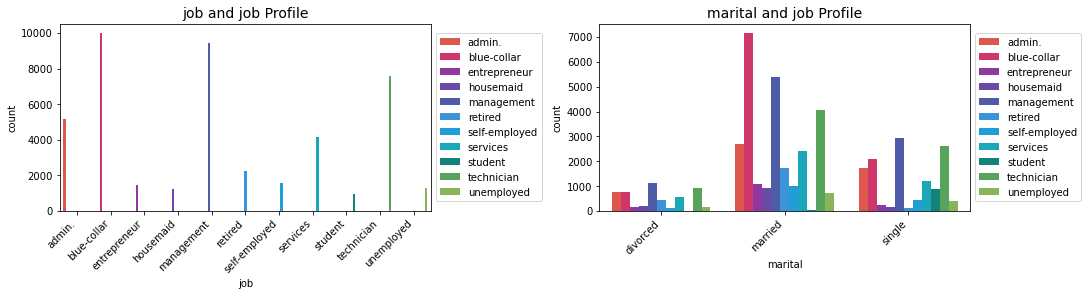

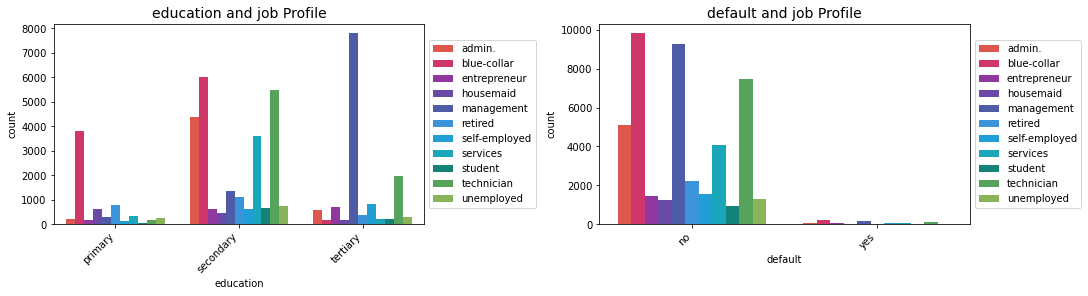

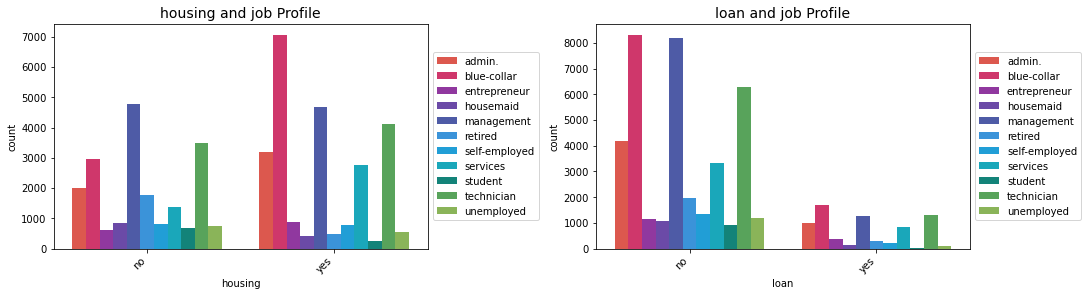

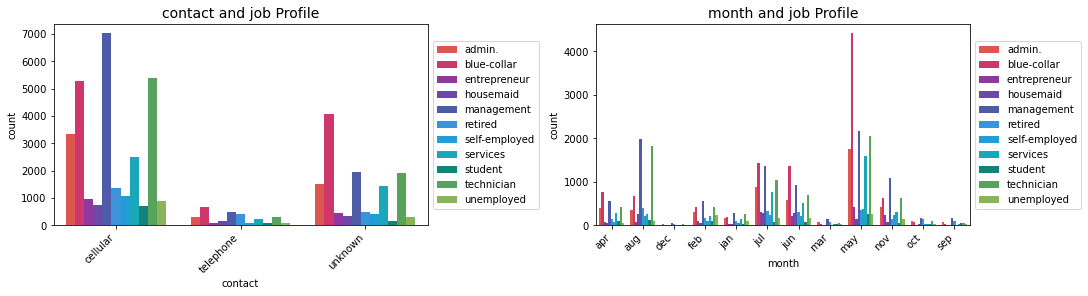

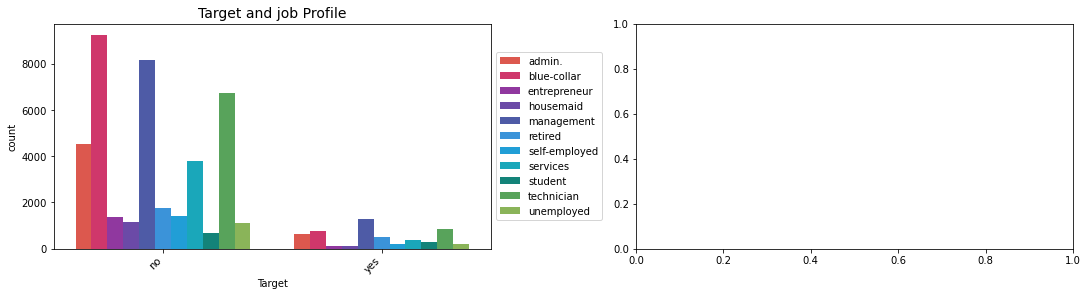

In [14]:
DisplayCountPlotGrid(
    col_names     = catgry_col_names,
    hue_name      = category,
    color_palette = default_color_palette)

#### Observations
- The age range profile of customers who are technitians, management and blue-collar is between 20 and 65 with most being in between 30 and 45 years old.

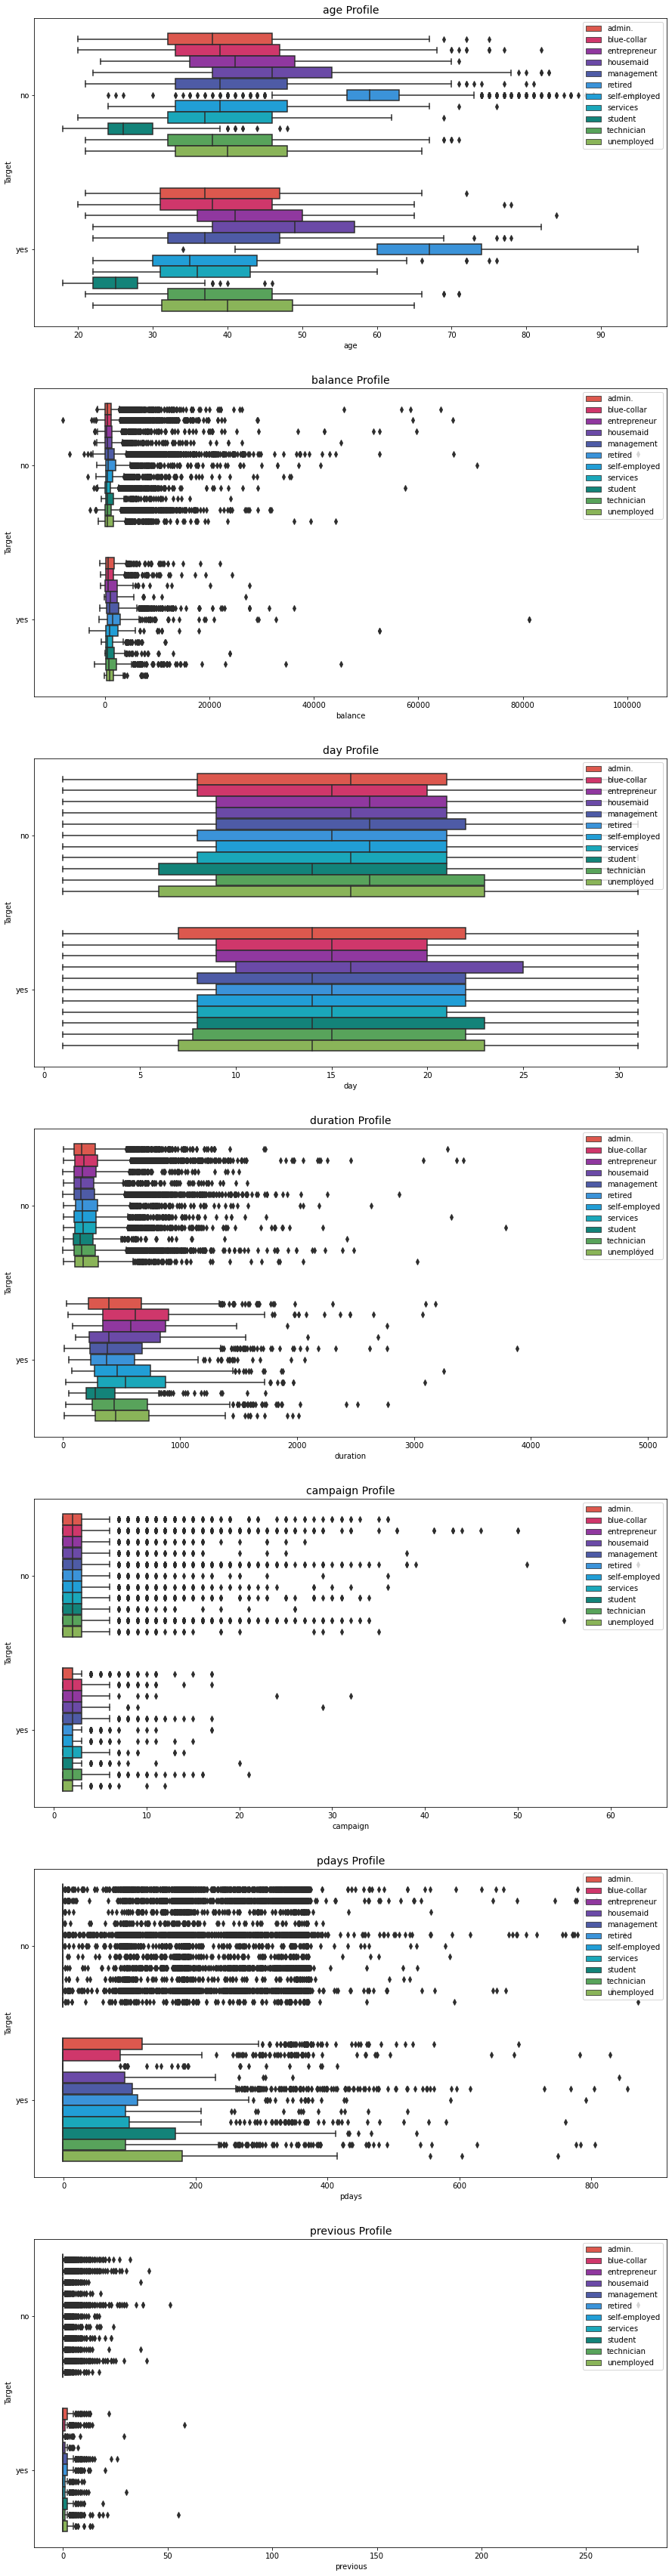

In [15]:
PlotLineOfBoxPlots(
    col_names       = descrete_data_columns,
    hue_name        = category,
    color_palette   = default_color_palette)

### Exploring Univariate and Bivariate Analysis based on `Marital` Status
- Most os the customers are married
- Mos of these married customers have secondary education as the highest level of education
- Most of these married customers have home loean
- most of these married customers have not subscribed

In [16]:
category = 'marital'
CountUniqueValues([category])

======================='marital'==================
married 	: 27214 (60.19%)
single 	: 12790 (28.29%)
divorced 	: 5207 (11.52%)



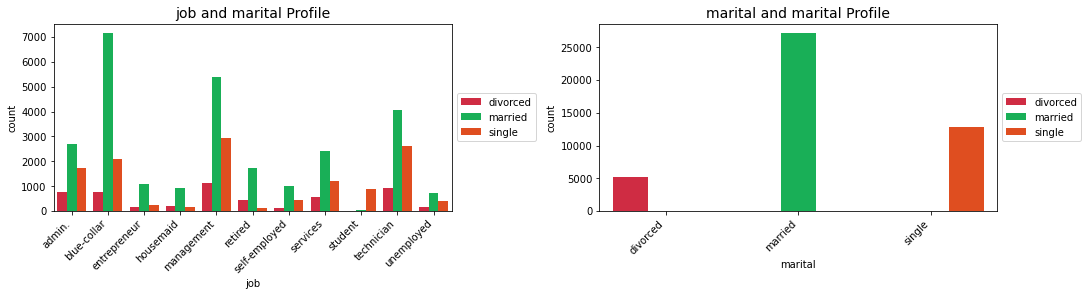

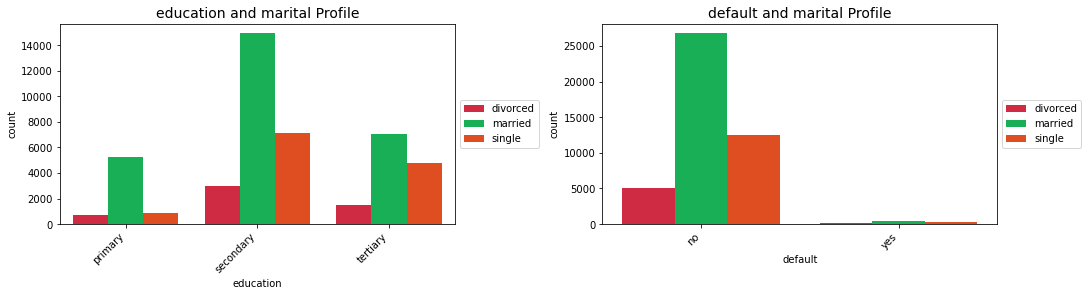

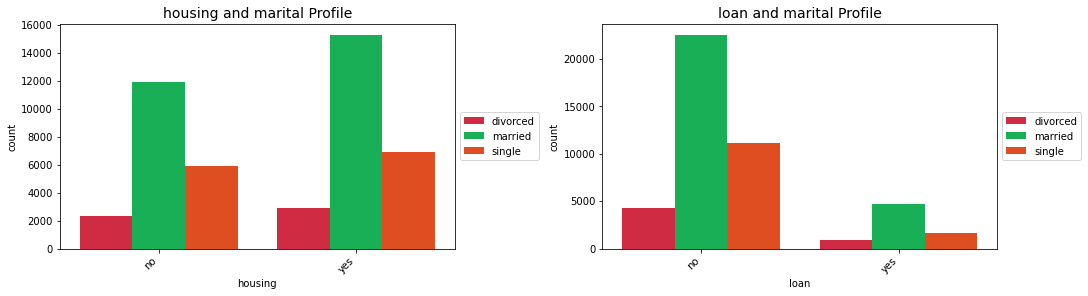

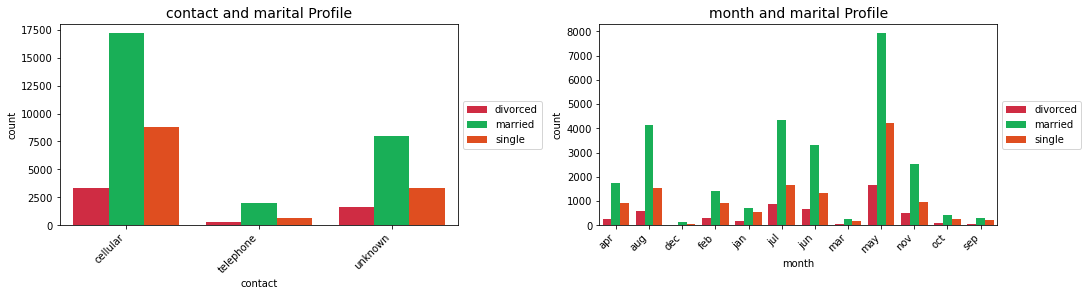

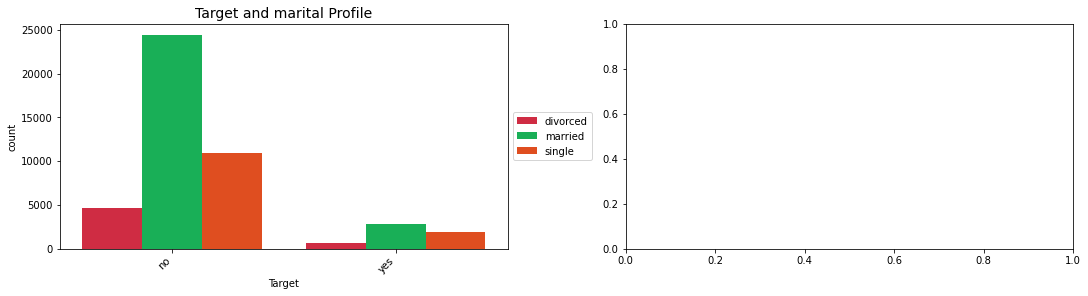

In [17]:
DisplayCountPlotGrid(
    col_names     = catgry_col_names,
    hue_name      = category,
    color_palette = maritalstatus_color_palette)

#### Observations
- Most of the married customers are in the age range 35 and 55

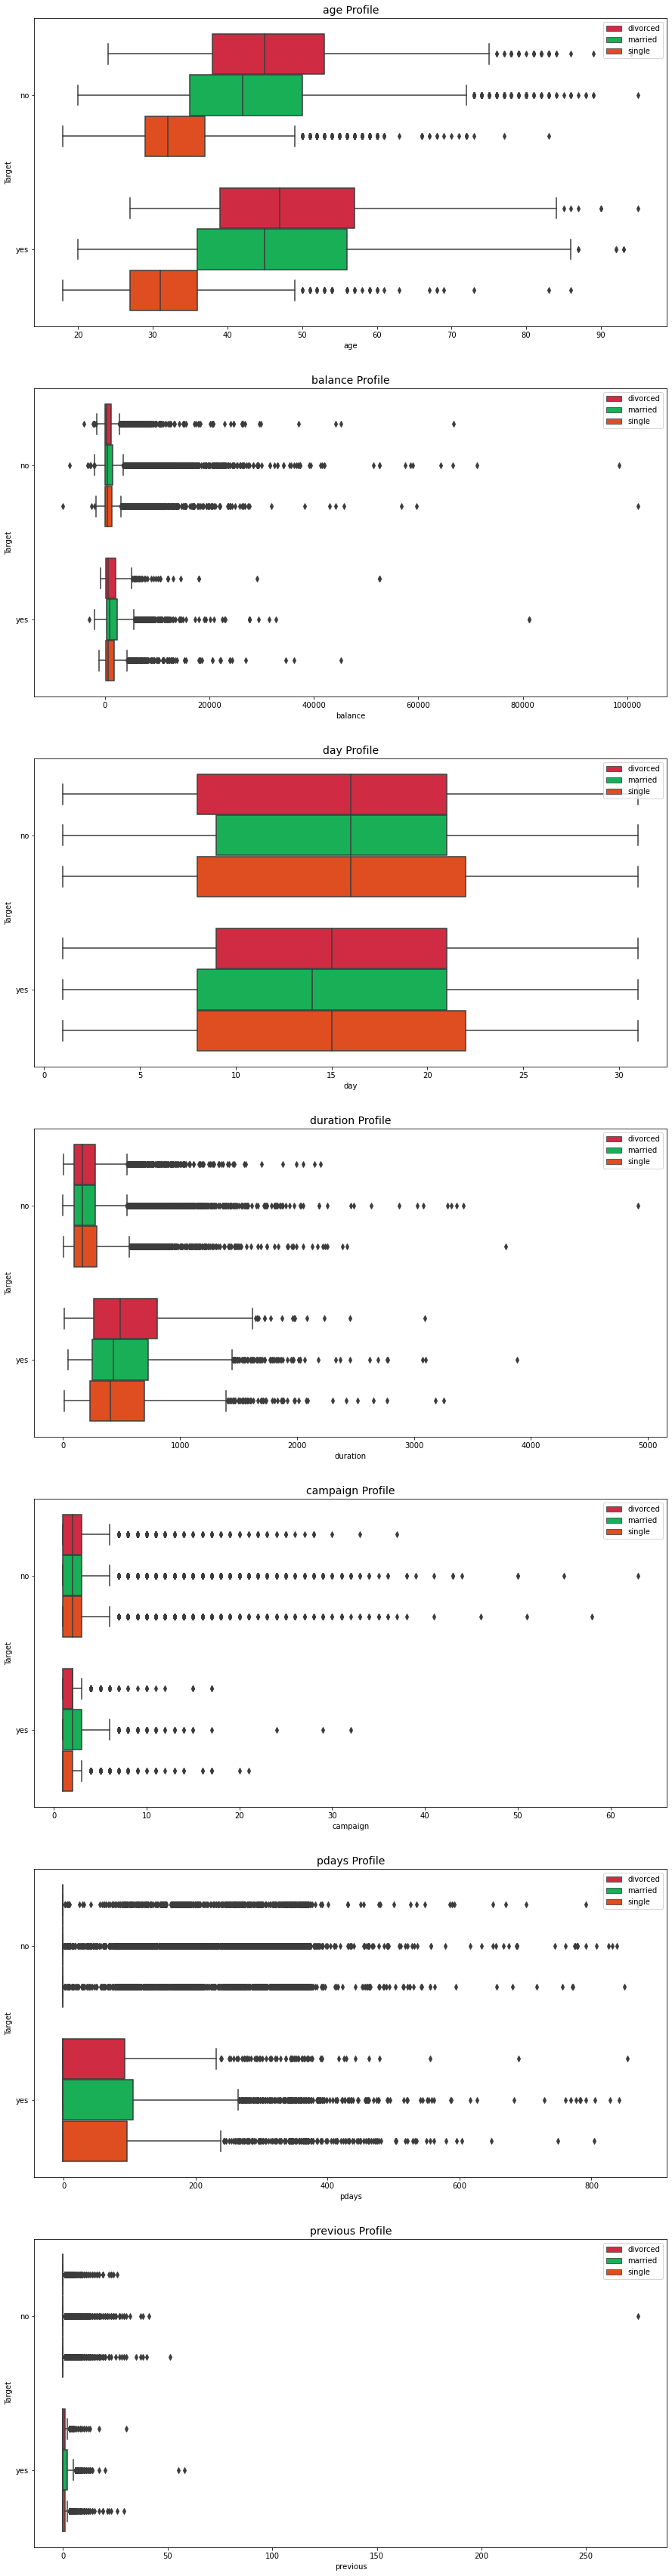

In [18]:
PlotLineOfBoxPlots(
    col_names       = descrete_data_columns,
    hue_name        = category,
    color_palette   = maritalstatus_color_palette)

### Exploring Univariate and Bivariate Analysis based on `Education` Status

In [19]:
category = 'education'
CountUniqueValues([category])

======================='education'==================
tertiary 	: 13301 (29.42%)
secondary 	: 25059 (55.43%)
primary 	: 6851 (15.15%)



### Observations
- A high number of married customers have secondary education
- Majority of the customers dont have a credit in default
- most of these customers who have secondary education have last been contacted in May
- most of these customers who have secondary education have not subscribed.
- most of the customers are in the age range 30-50

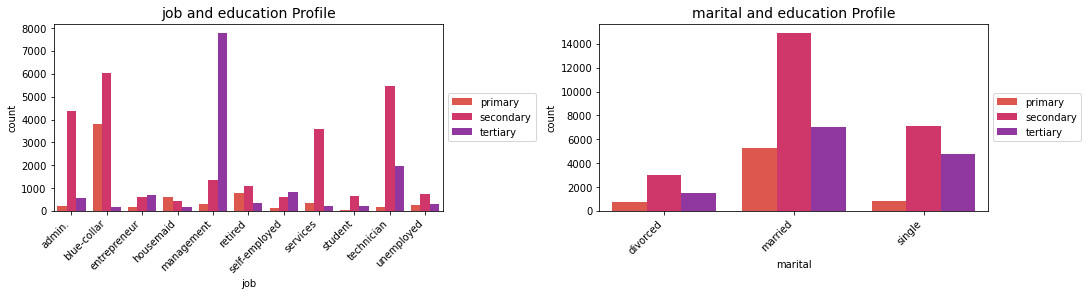

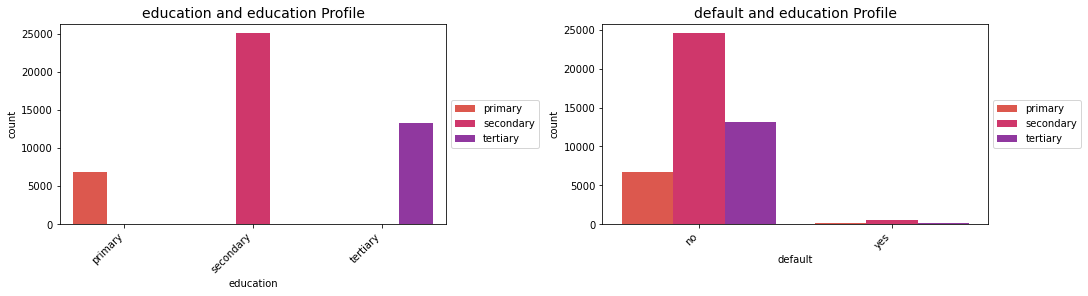

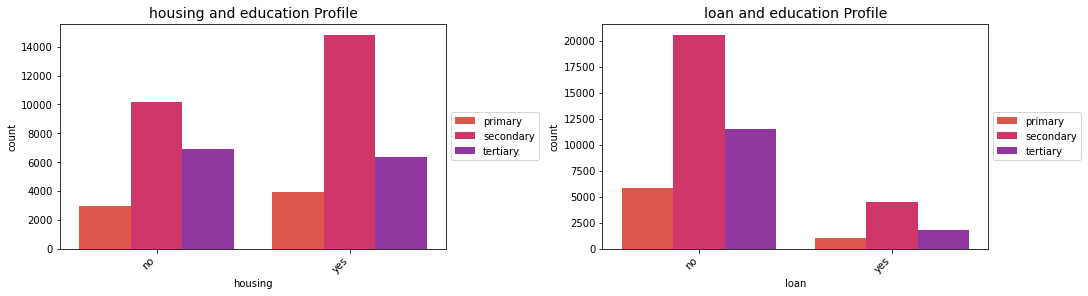

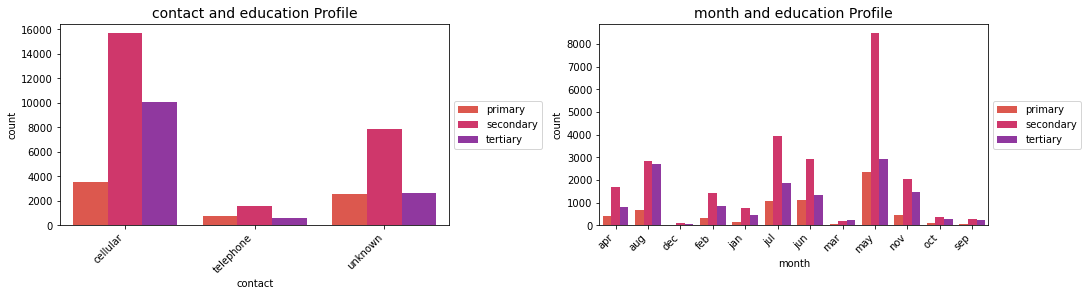

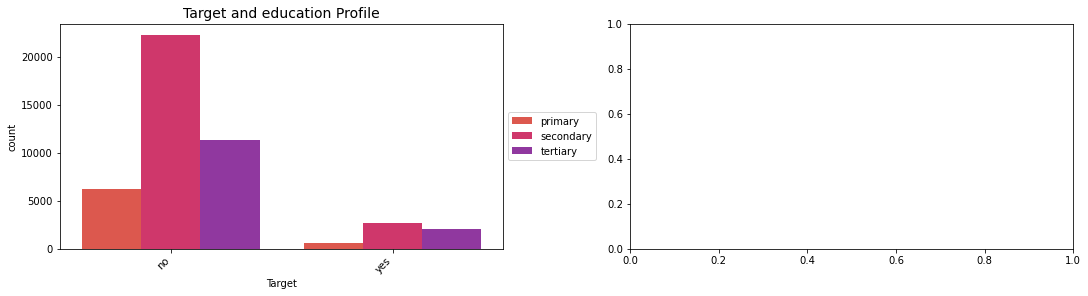

In [20]:
DisplayCountPlotGrid(
    col_names     = catgry_col_names,
    hue_name      = category,
    color_palette = default_color_palette)

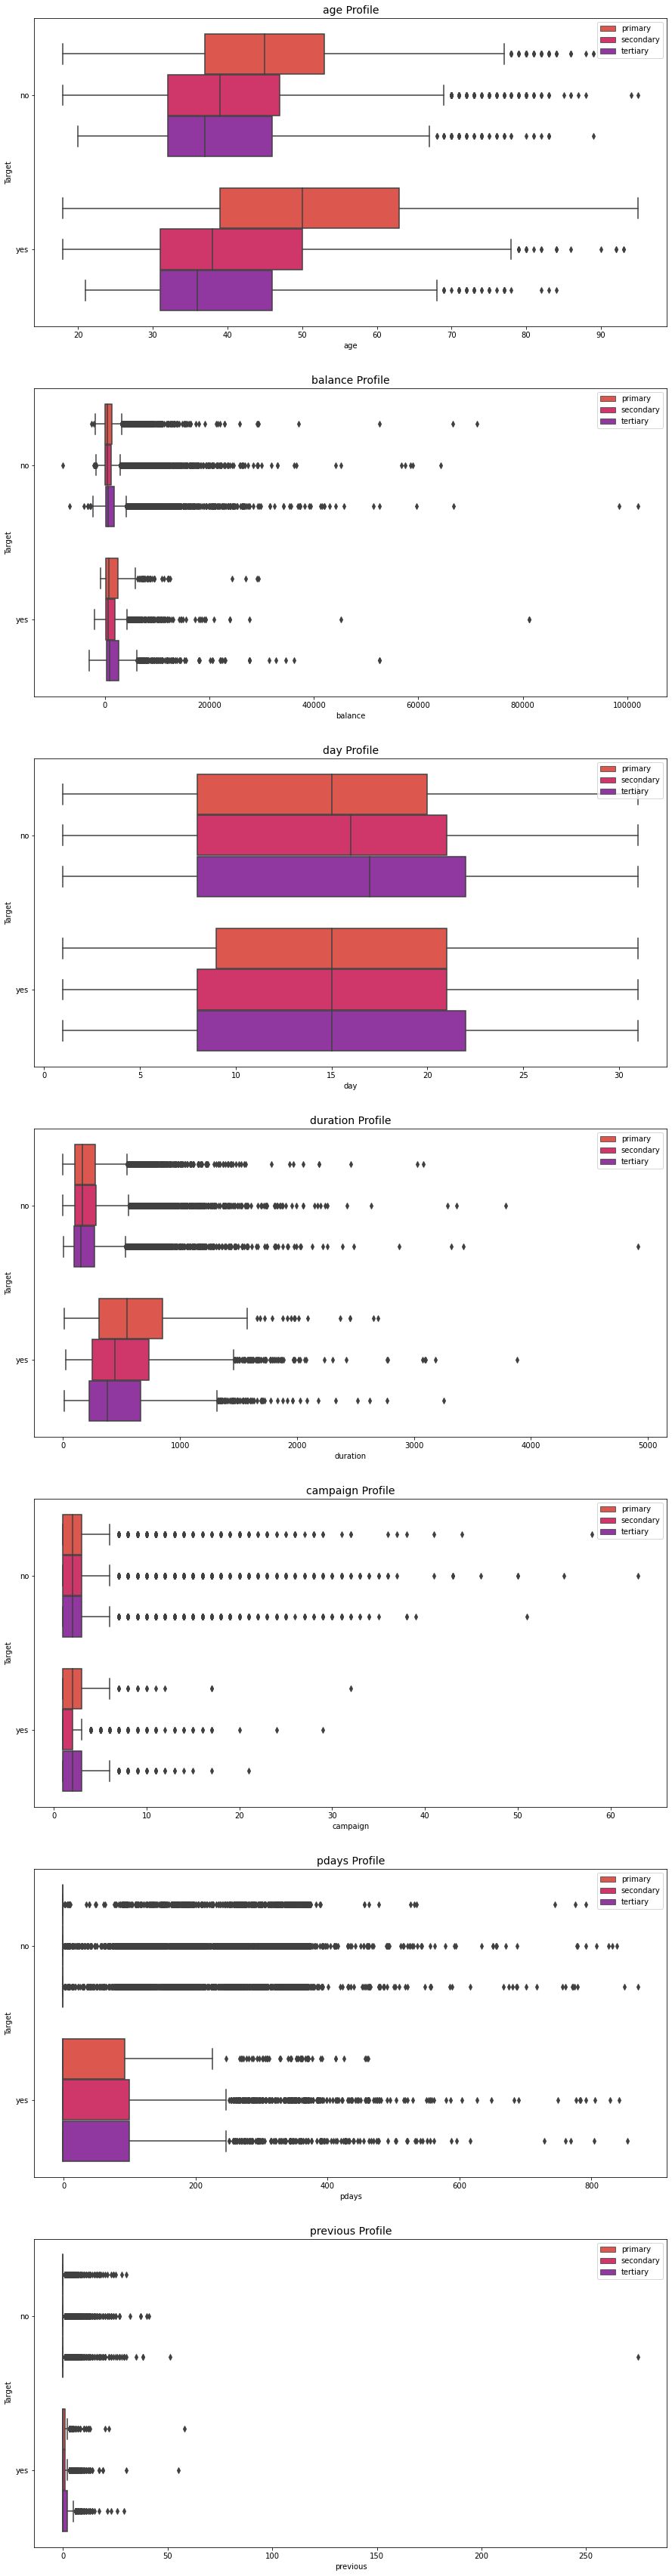

In [21]:
PlotLineOfBoxPlots(
    col_names       = descrete_data_columns,
    hue_name        = category,
    color_palette   = default_color_palette)

### Exploring Univariate and Bivariate Analysis based on `Housing` Status
- Most of the customers who were contacted in May have a housing loan
- A fraction more of customers who have not subscribed have a housing loan
- Theres more older clients who have subcribed than those who did not.

In [22]:
category = 'housing'
CountUniqueValues([category])

======================='housing'==================
yes 	: 25130 (55.58%)
no 	: 20081 (44.42%)



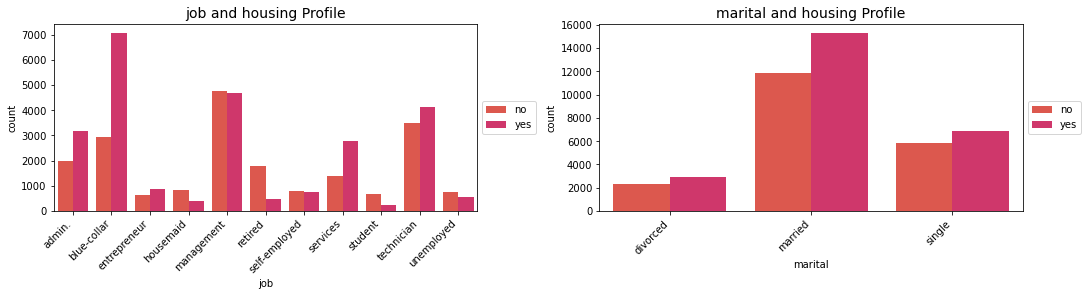

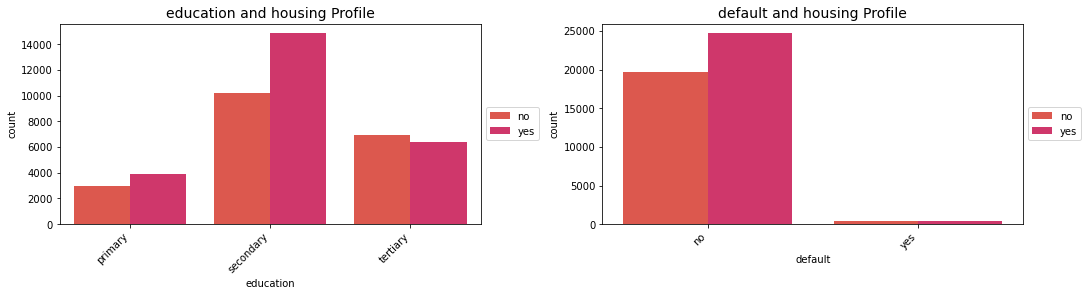

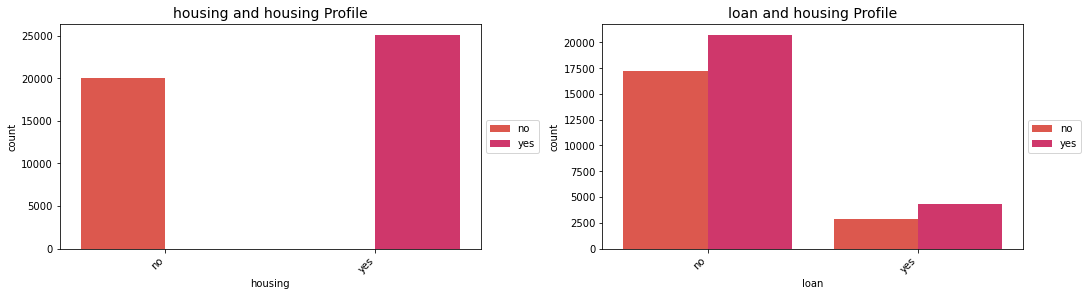

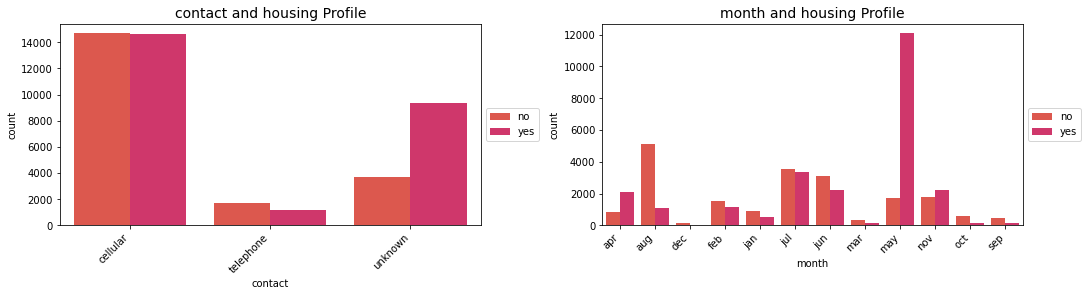

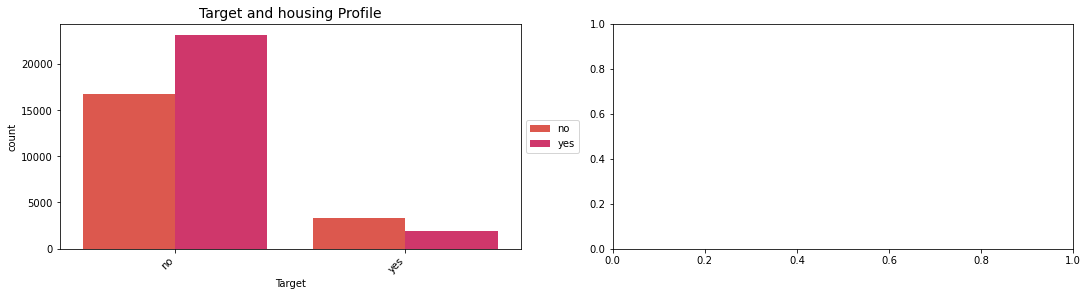

In [23]:
DisplayCountPlotGrid(
    col_names     = catgry_col_names,
    hue_name      = category,
    color_palette = default_color_palette)

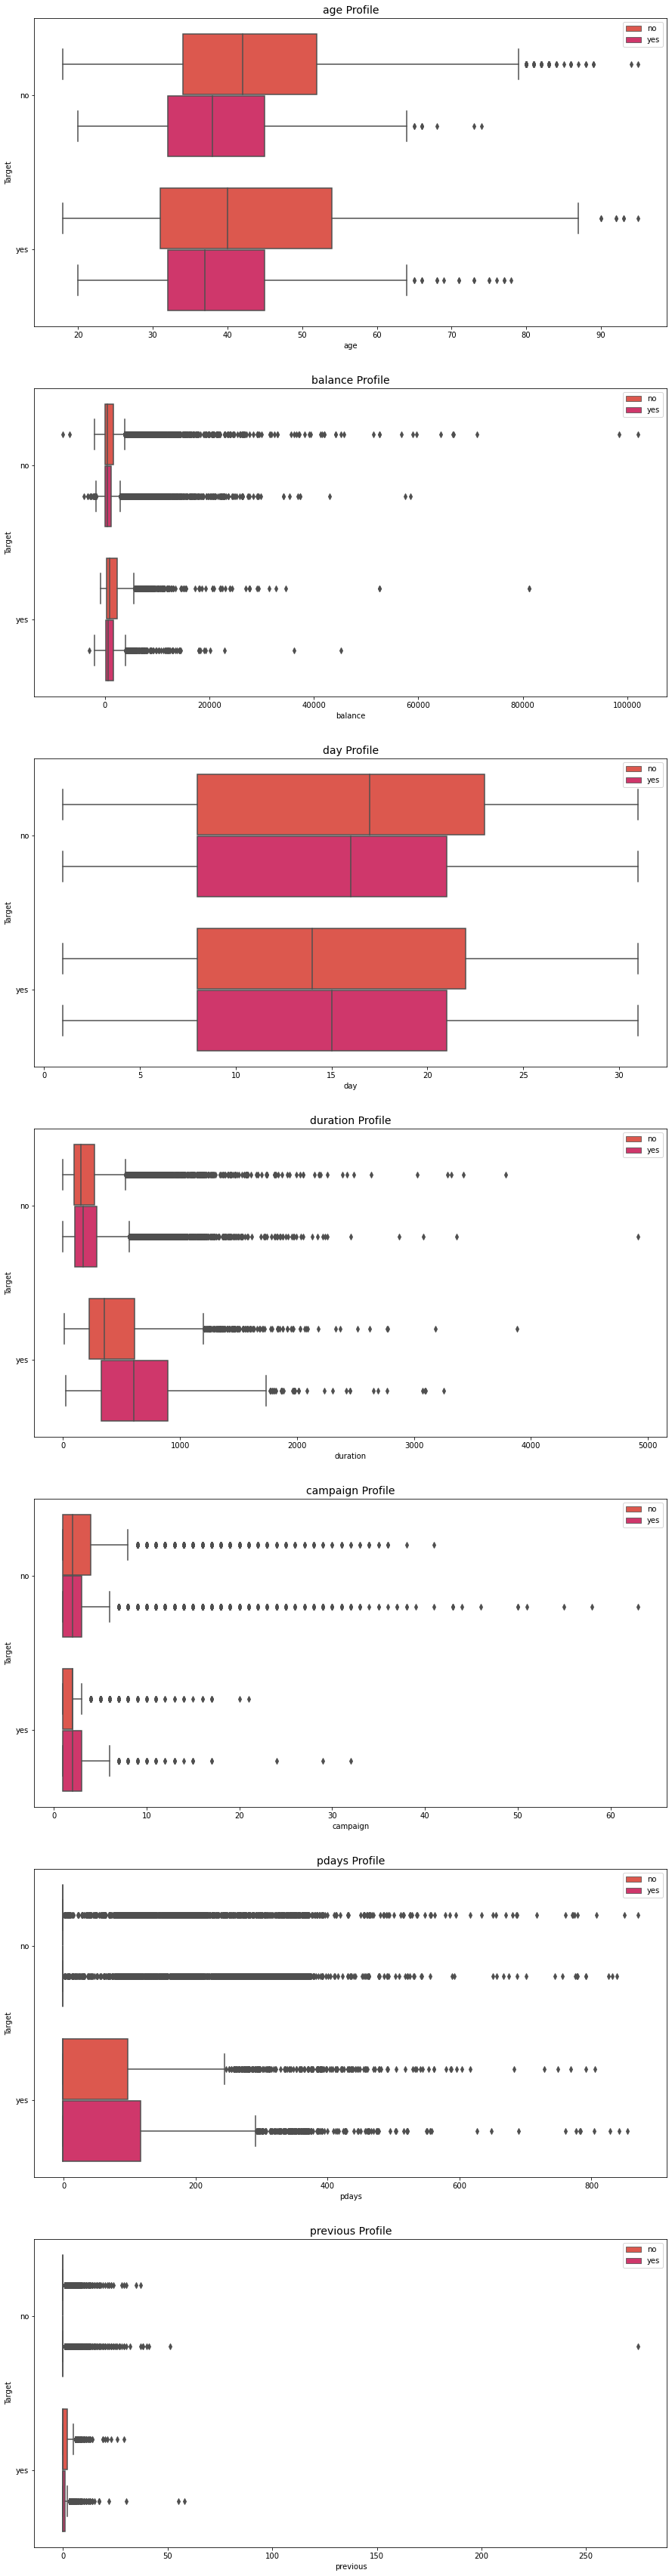

In [24]:
PlotLineOfBoxPlots(
    col_names       = descrete_data_columns,
    hue_name        = category,
    color_palette   = default_color_palette)

### Exploring Univariate and Bivariate Analysis based on `default` Status
- Most customers who have not scubcribed also do NOT have a credit in default.


In [25]:
category = 'default'
CountUniqueValues([category])

======================='default'==================
no 	: 44396 (98.2%)
yes 	: 815 (1.8%)



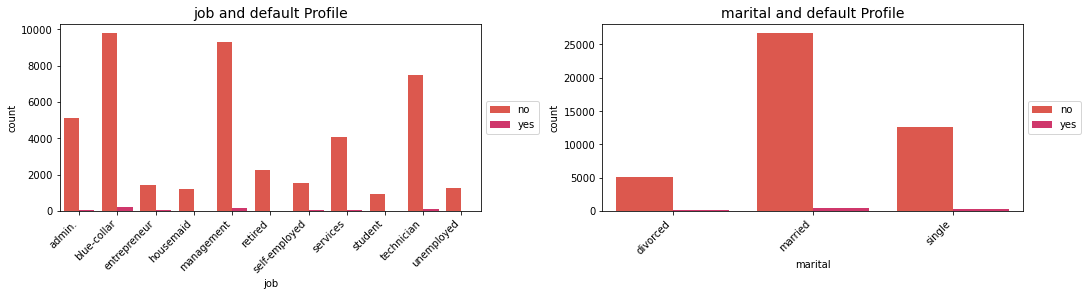

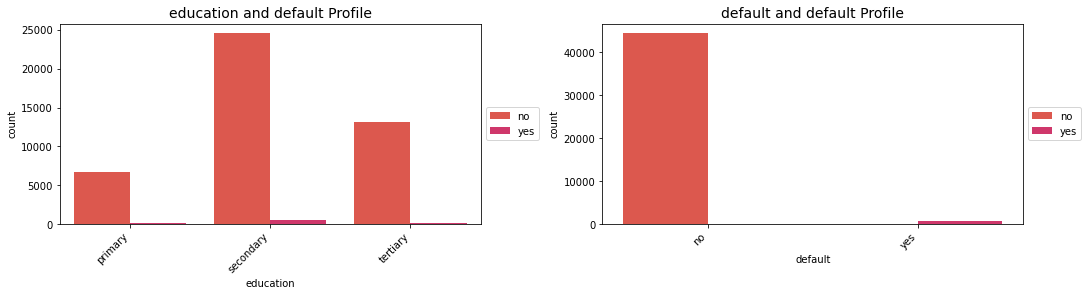

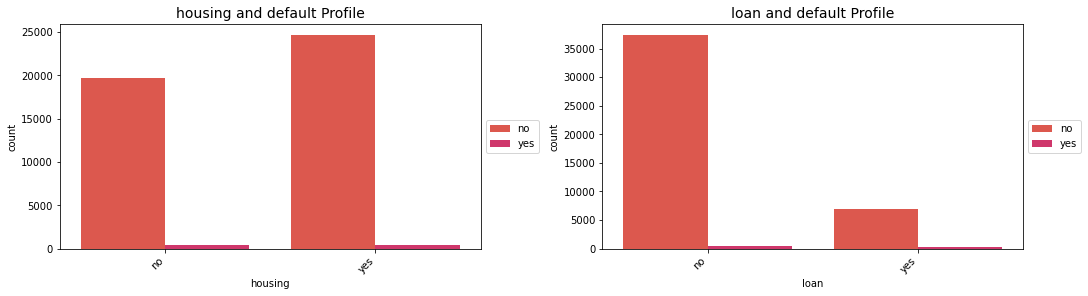

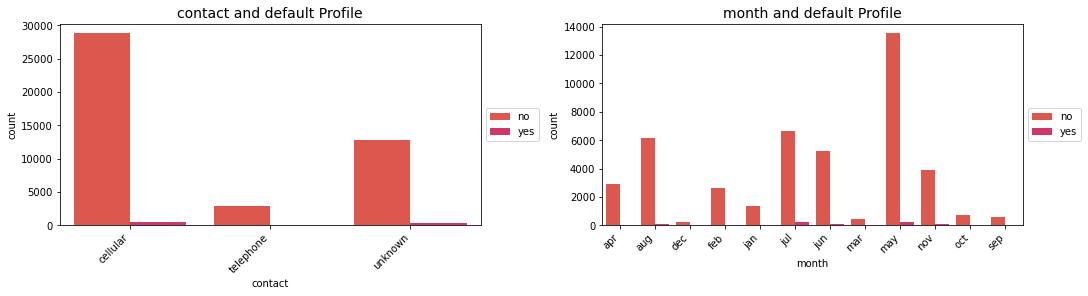

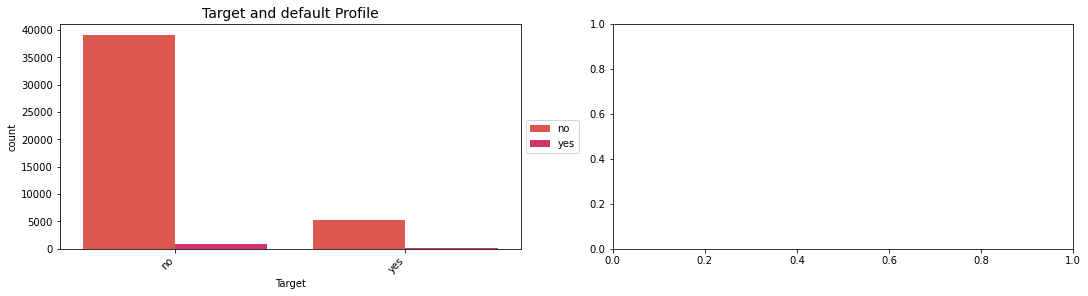

In [26]:
DisplayCountPlotGrid(
    col_names     = catgry_col_names,
    hue_name      = category,
    color_palette = default_color_palette)

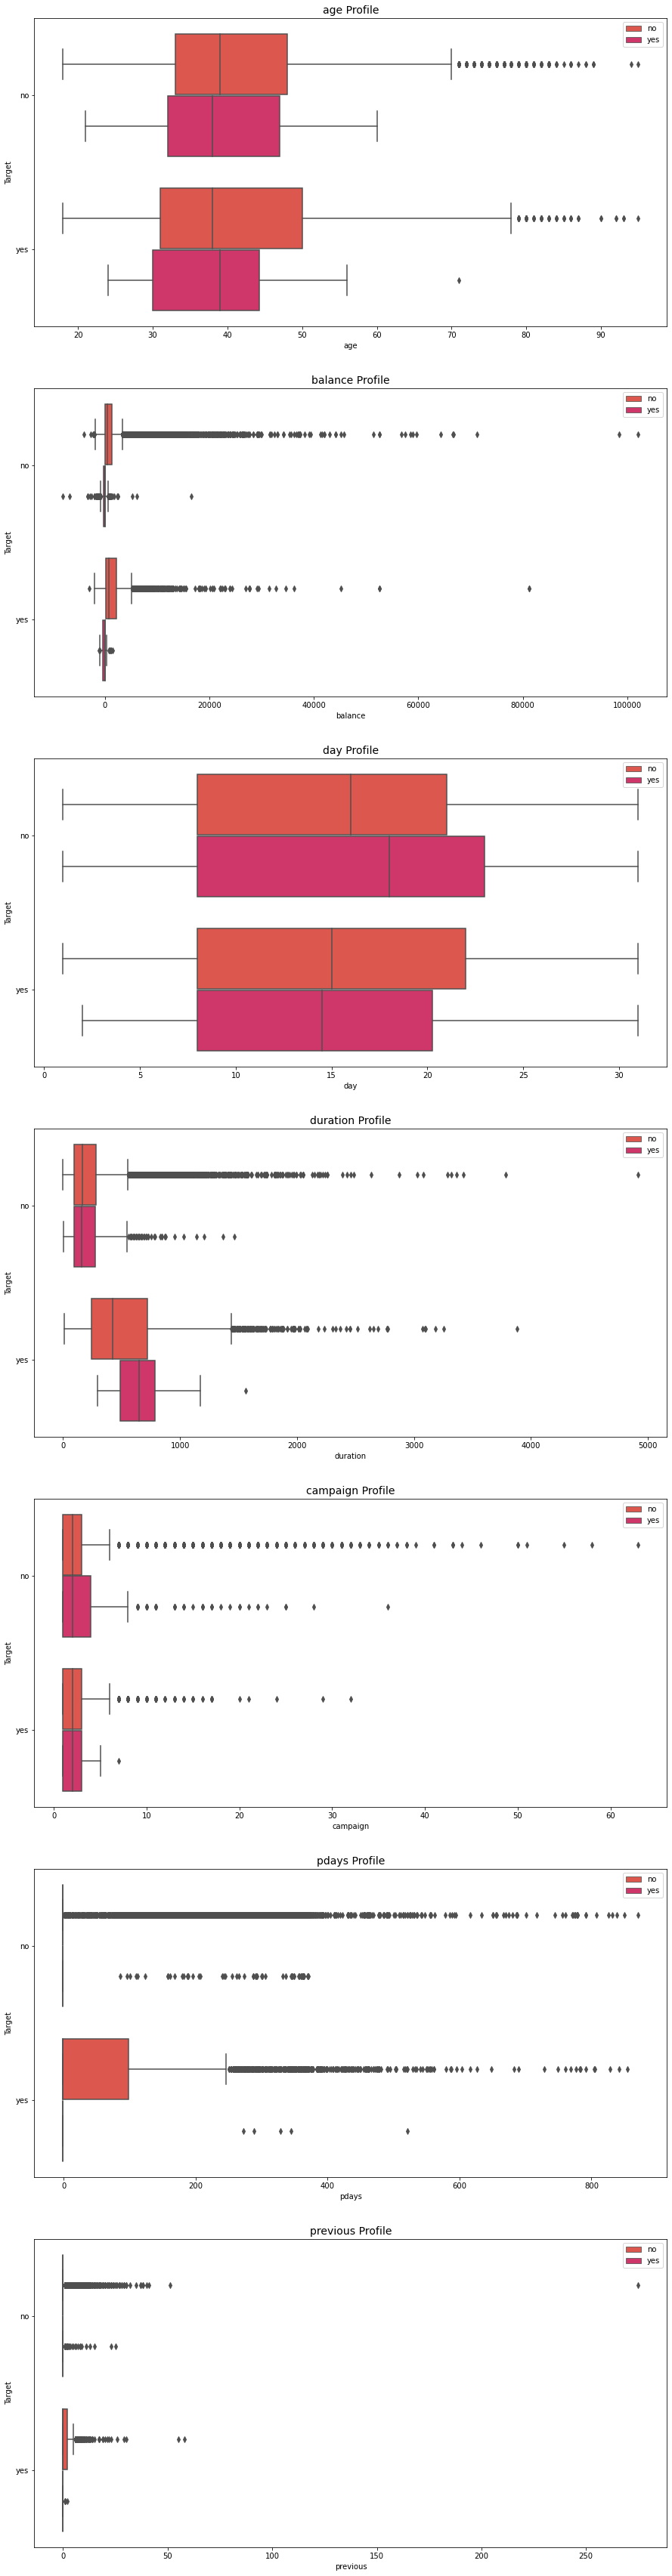

In [27]:
PlotLineOfBoxPlots(
    col_names       = descrete_data_columns,
    hue_name        = category,
    color_palette   = default_color_palette)

### Exploring Univariate and Bivariate Analysis based on `loan` Status

In [28]:
category = 'loan'
CountUniqueValues([category])

======================='loan'==================
no 	: 37967 (83.98%)
yes 	: 7244 (16.02%)



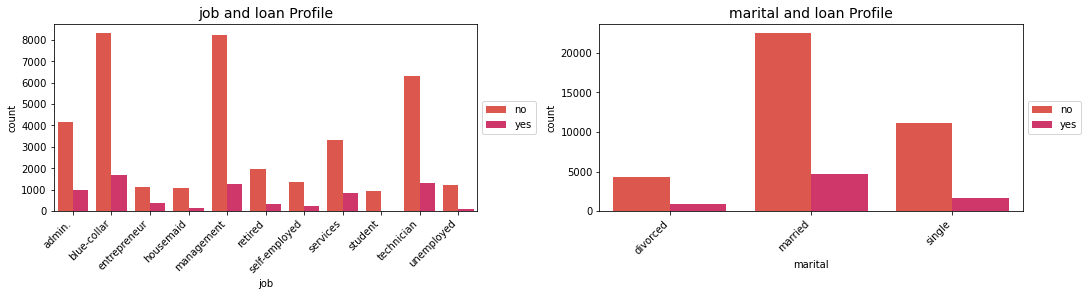

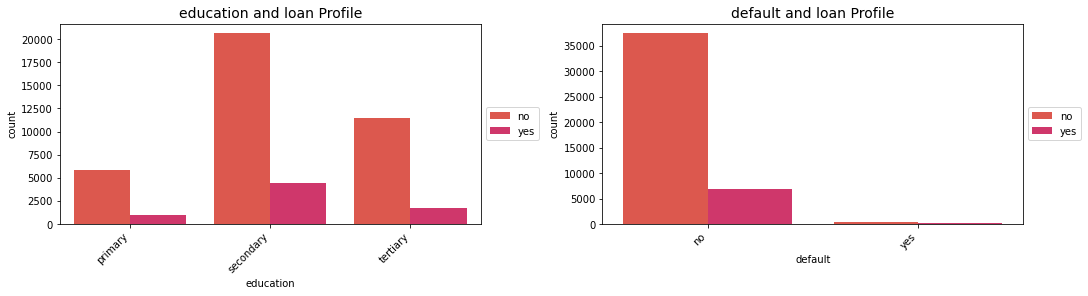

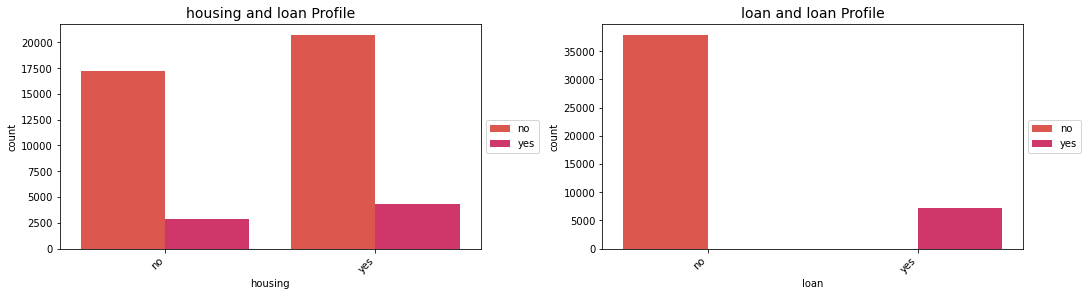

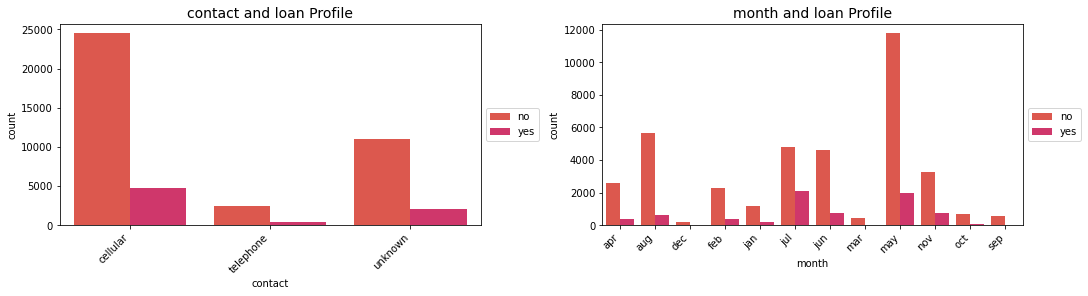

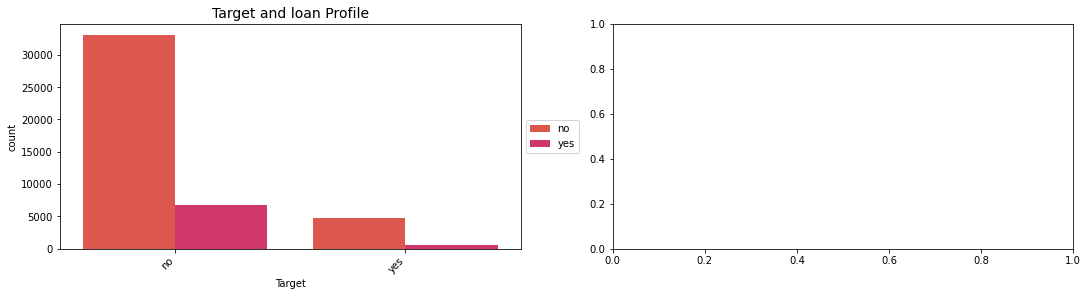

In [29]:
DisplayCountPlotGrid(
    col_names     = catgry_col_names,
    hue_name      = category,
    color_palette = default_color_palette)

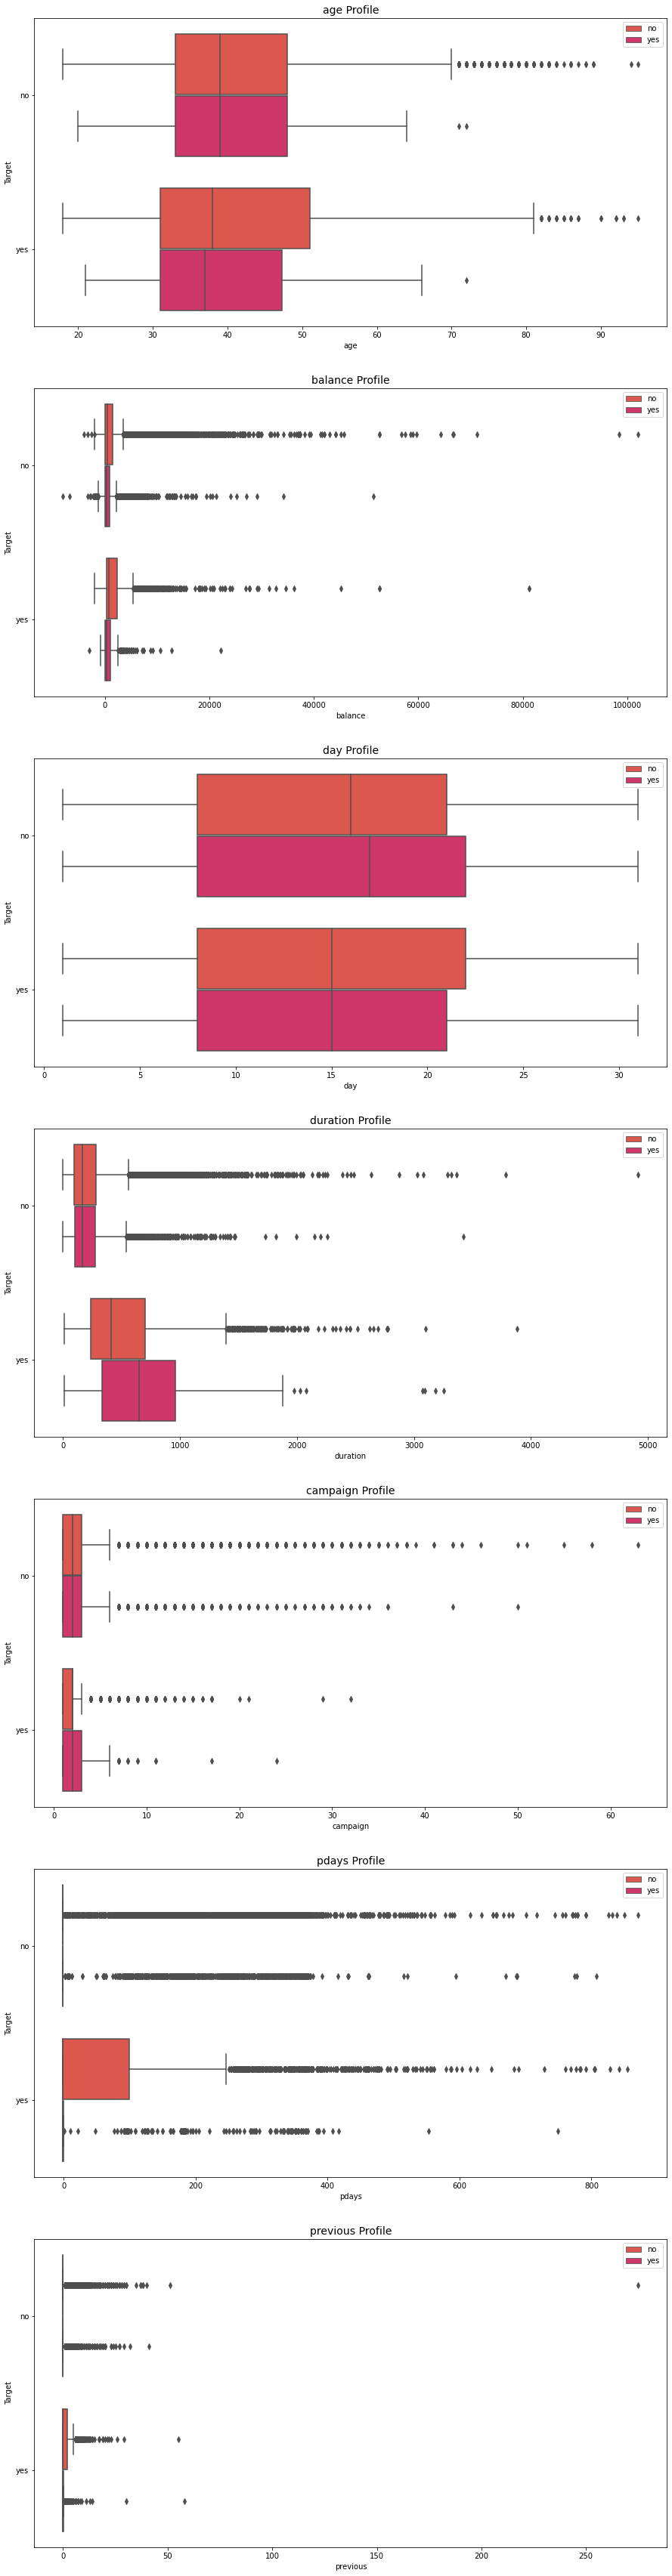

In [30]:
PlotLineOfBoxPlots(
    col_names       = descrete_data_columns,
    hue_name        = category,
    color_palette   = default_color_palette)

### Exploring Univariate and Bivariate Analysis based on `contact` Status
- Cellular seems to be the most dominant contact channel.
- The same customers who use cellular are also in the age range 30-50

In [31]:
category = 'contact'
CountUniqueValues([category])

======================='contact'==================
unknown 	: 13020 (28.8%)
cellular 	: 29285 (64.77%)
telephone 	: 2906 (6.43%)



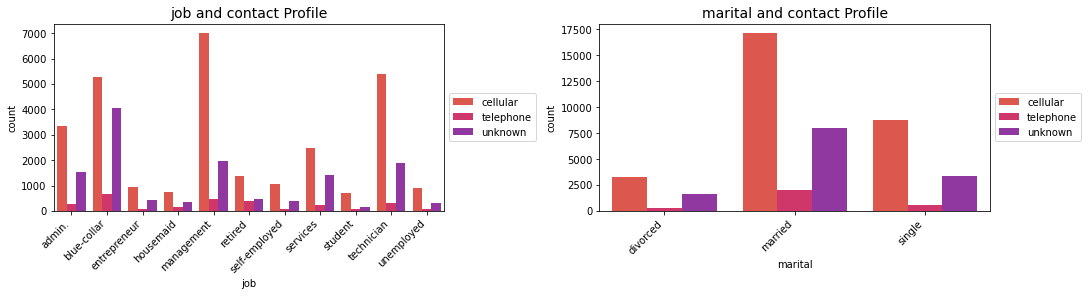

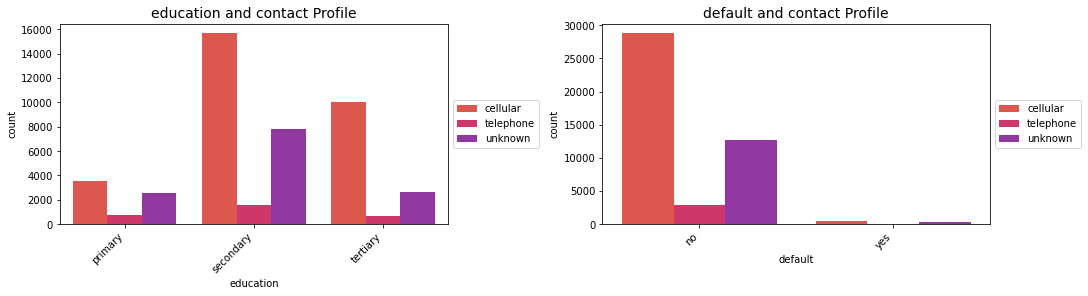

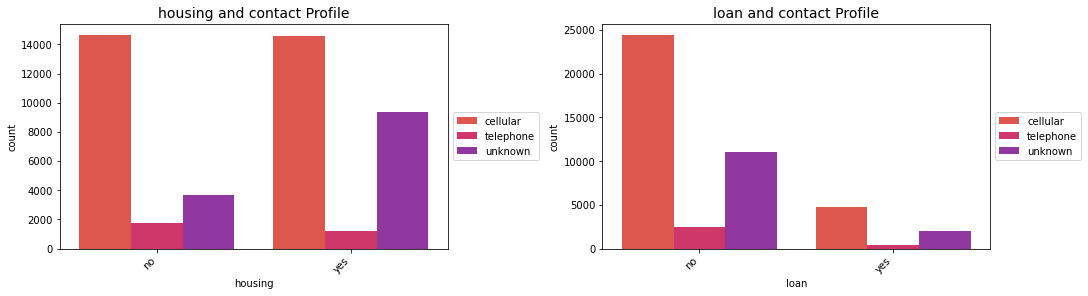

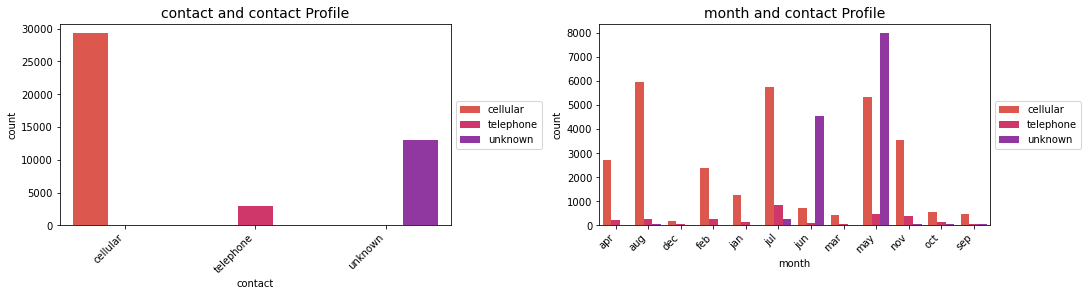

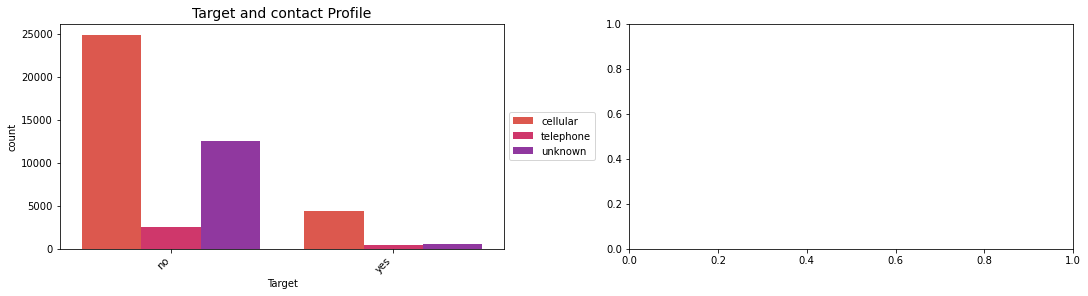

In [32]:
DisplayCountPlotGrid(
    col_names     = catgry_col_names,
    hue_name      = category,
    color_palette = default_color_palette)

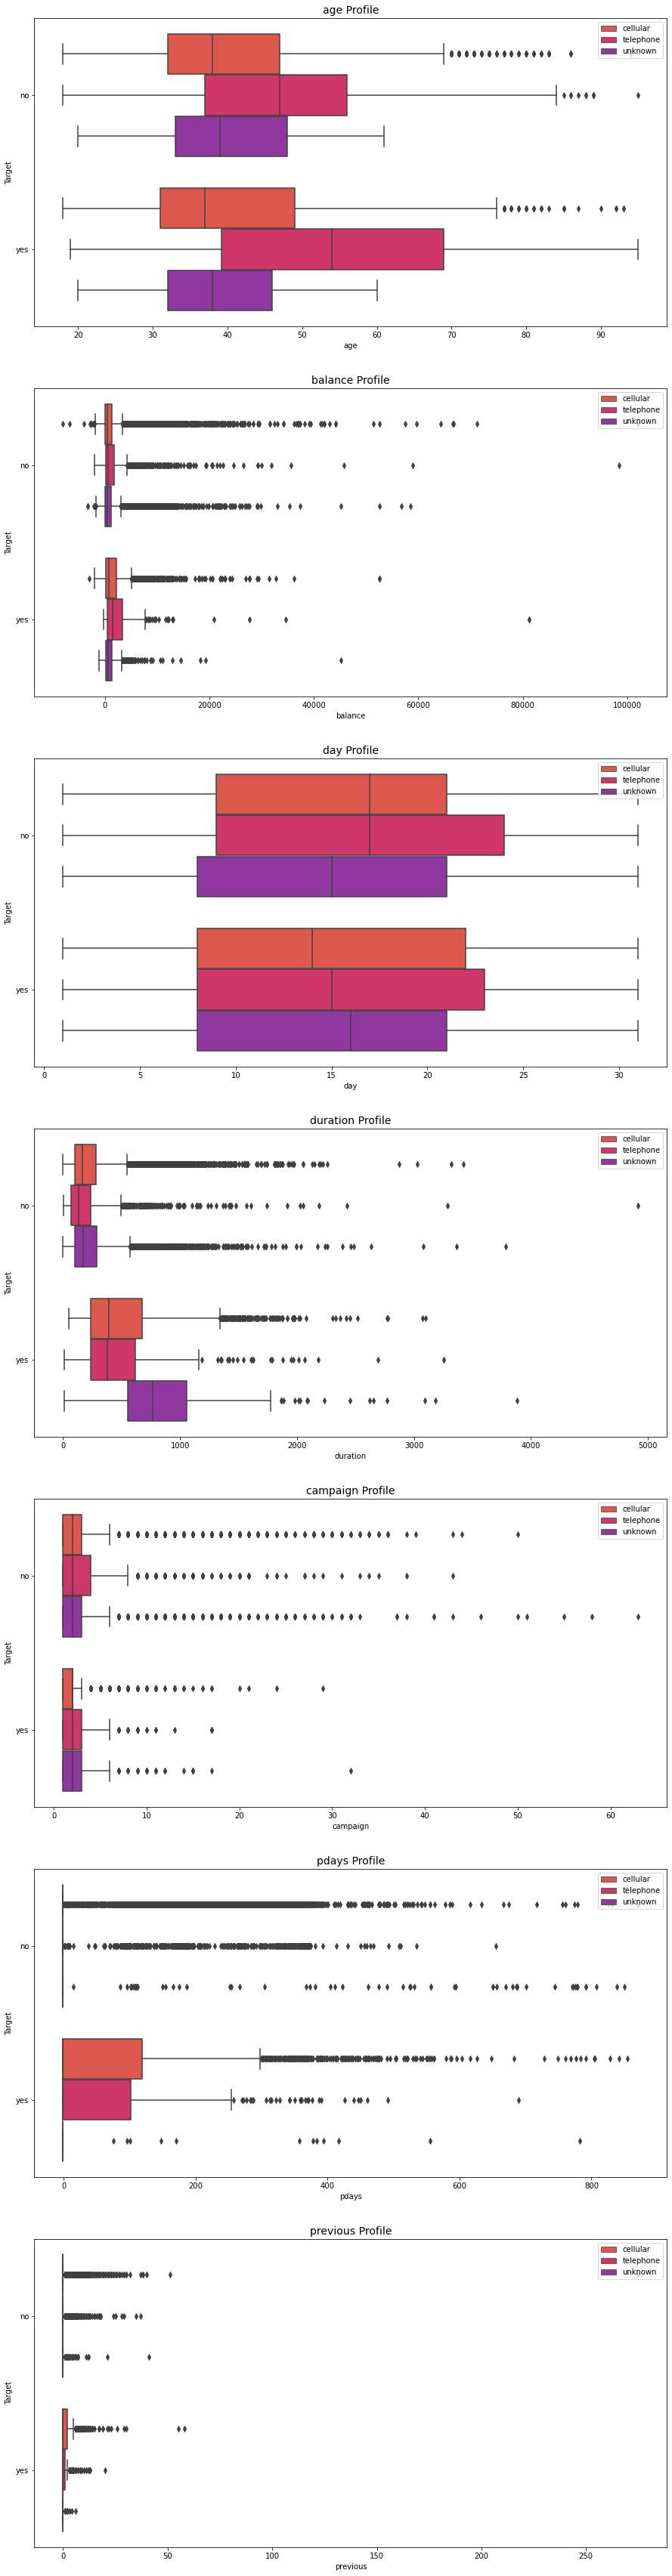

In [33]:
PlotLineOfBoxPlots(
    col_names       = descrete_data_columns,
    hue_name        = category,
    color_palette   = default_color_palette)

### Exploring Univariate and Bivariate Analysis based on `month` Status
- Most customers were contacted in May, are married, have a home loan, work in blue collar, have secondary education and have not subscribed.

In [34]:
category = 'month'
CountUniqueValues([category])

======================='month'==================
may 	: 13766 (30.45%)
jun 	: 5341 (11.81%)
jul 	: 6895 (15.25%)
aug 	: 6247 (13.82%)
oct 	: 738 (1.63%)
nov 	: 3970 (8.78%)
dec 	: 214 (0.47%)
jan 	: 1403 (3.1%)
feb 	: 2649 (5.86%)
mar 	: 477 (1.06%)
apr 	: 2932 (6.49%)
sep 	: 579 (1.28%)



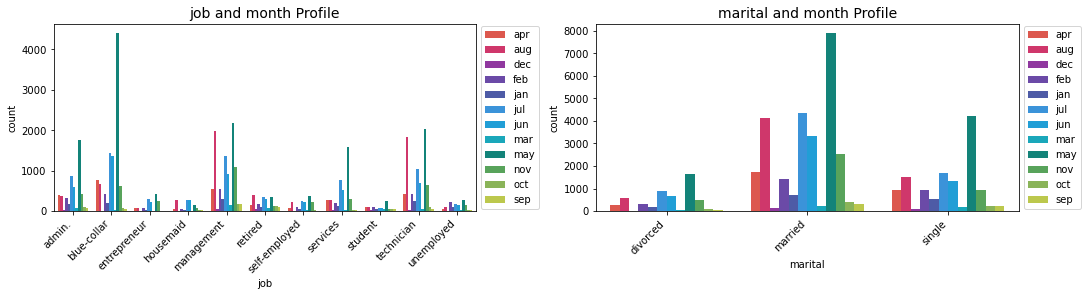

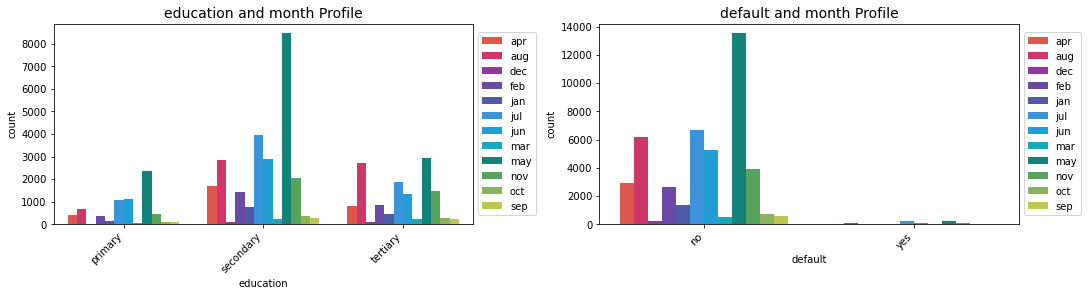

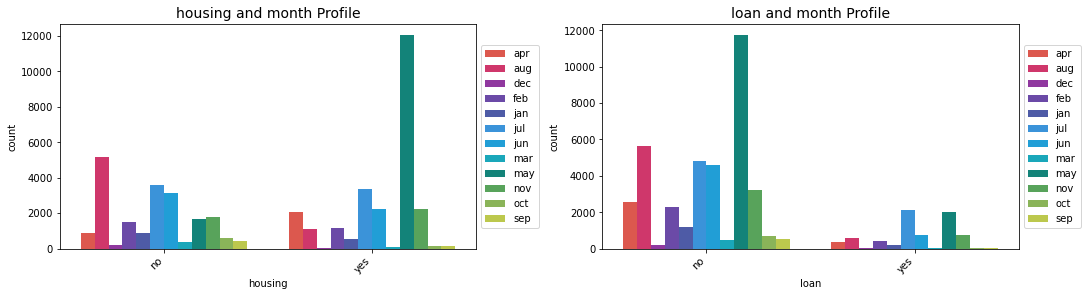

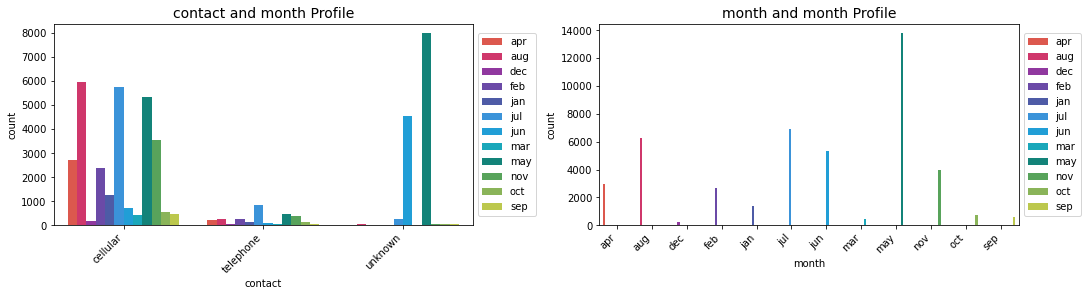

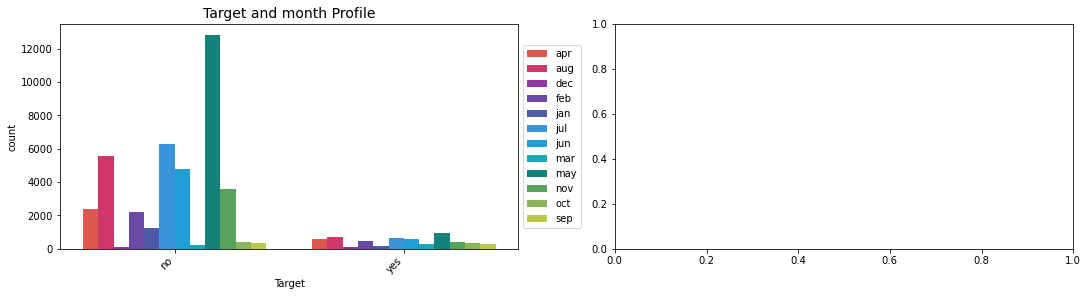

In [35]:
DisplayCountPlotGrid(
    col_names       = catgry_col_names,
    hue_name        = category,
    color_palette   = default_color_palette)

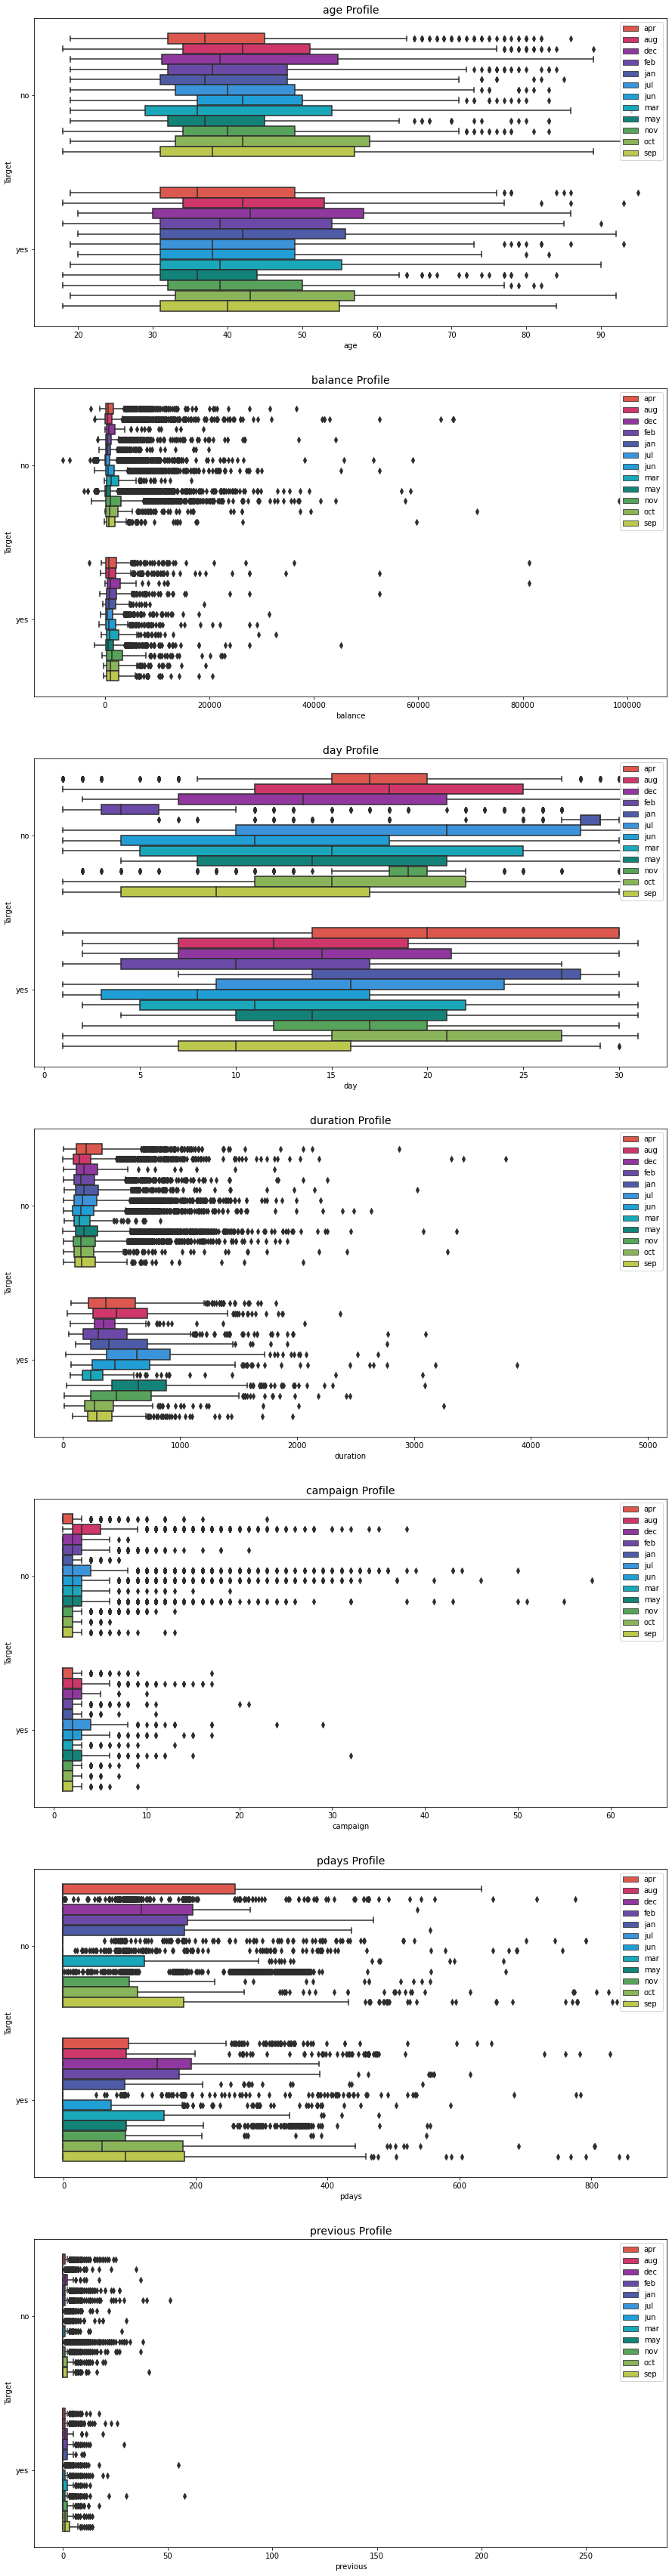

In [36]:
PlotLineOfBoxPlots(
    col_names       = descrete_data_columns,
    hue_name        = category,
    color_palette   = default_color_palette)

### Exploring Univariate and Bivariate Analysis based on `Target` Status
- Theres more customers who have not subscribed compared to those who have (88% to 12%)
- Most customers who have a personal loan have not subscribed.
- More customers who use cellular have have subscribed.
- More customers who have not subscribed were contacted in May,maybe tyring again on a different month would work.
- More customers with secondary education have not subscribed.
- Theres more customers who are married who have not subscribed compared to those who are not married.
- Customers who have not subscribed are in the age 30-50

In [37]:
category = 'Target'
CountUniqueValues([category])

======================='Target'==================
no 	: 39922 (88.3%)
yes 	: 5289 (11.7%)



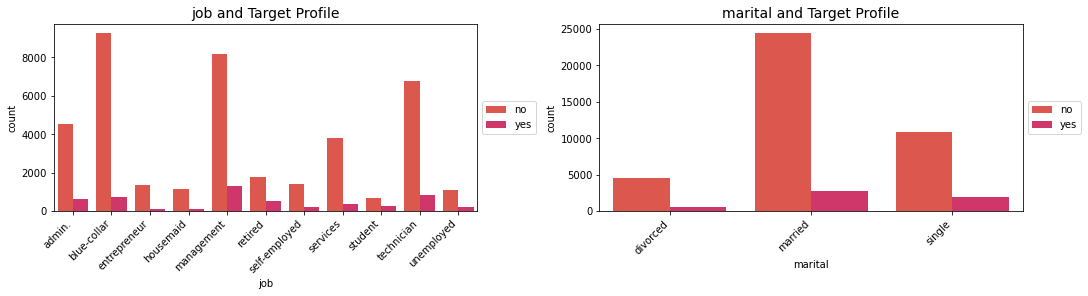

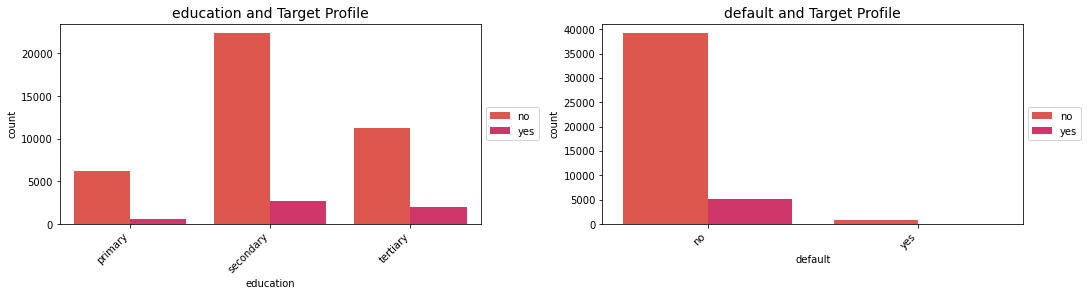

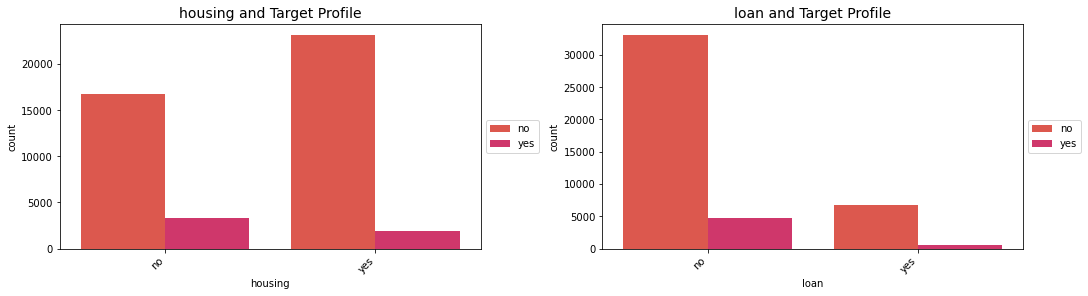

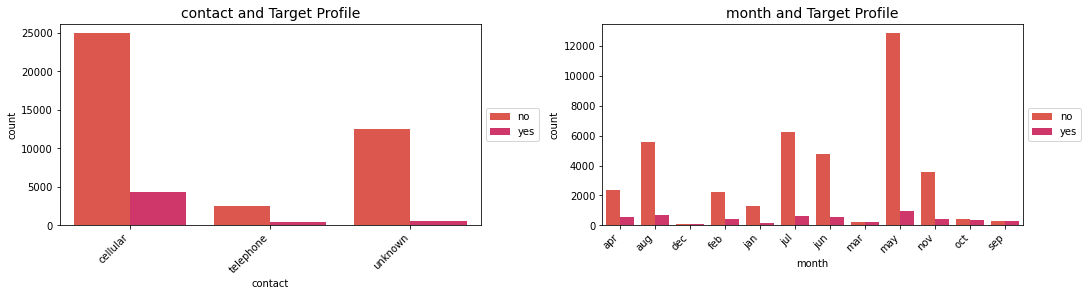

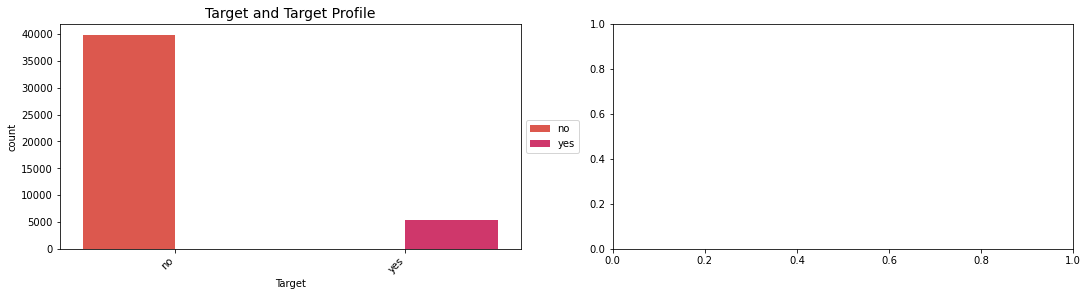

In [38]:
DisplayCountPlotGrid(
    col_names     = catgry_col_names,
    hue_name      = category,
    color_palette = default_color_palette)

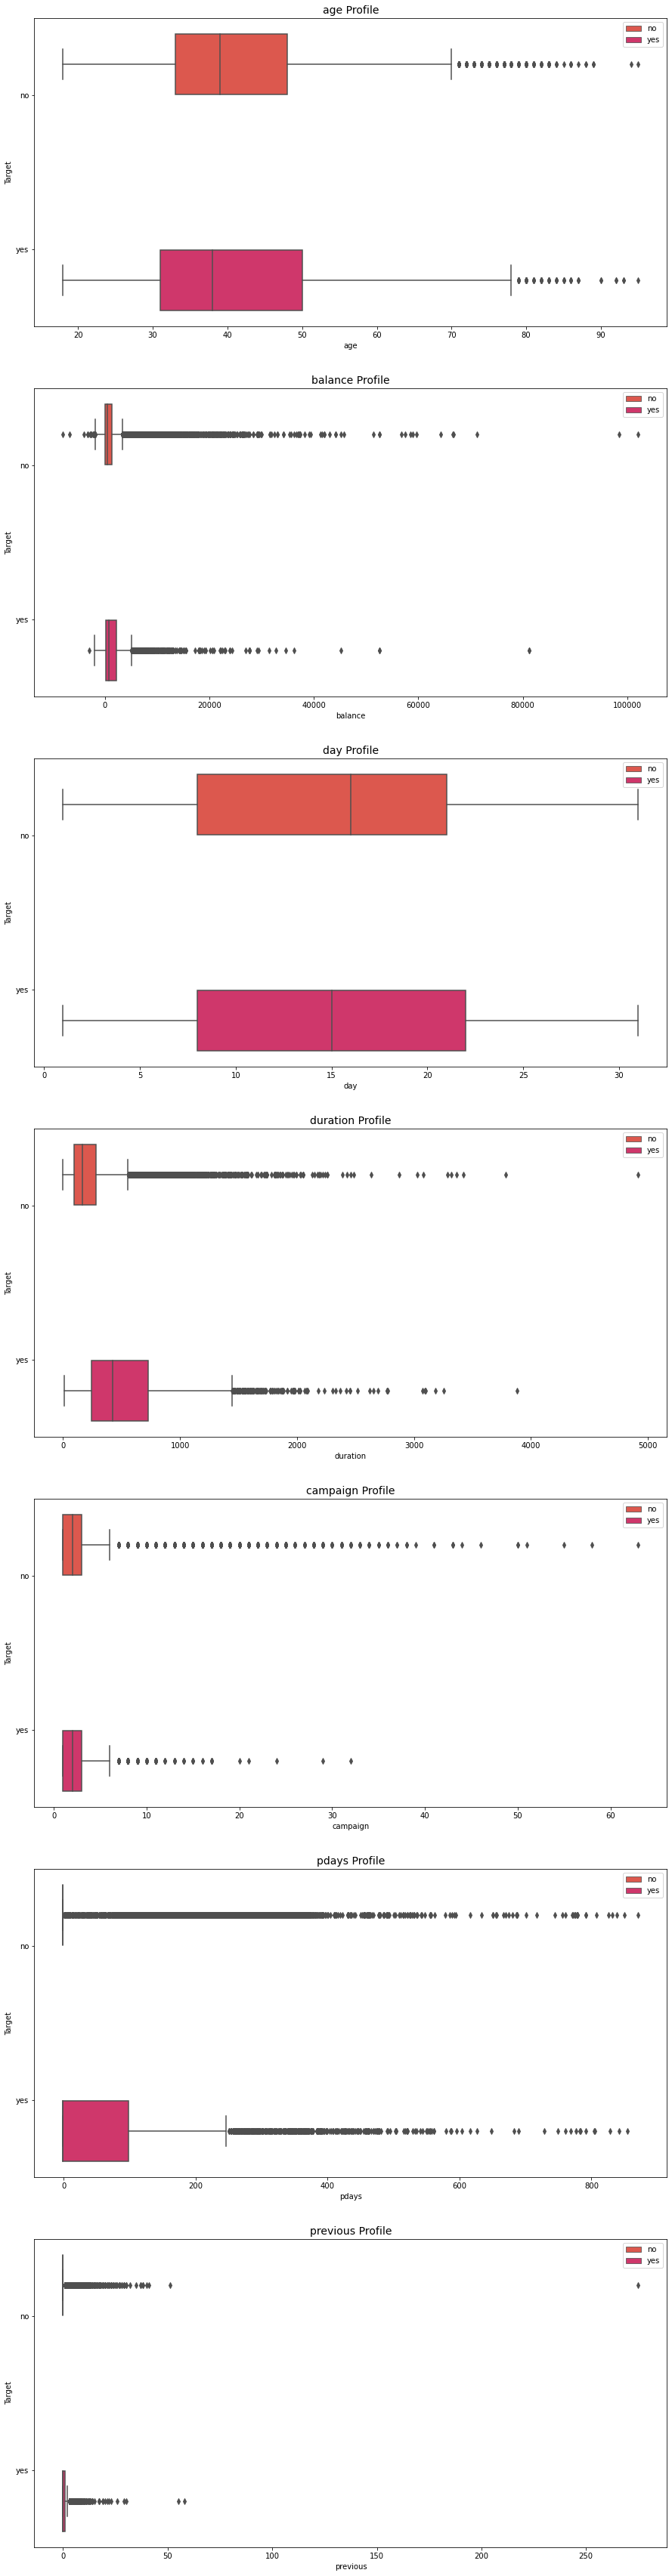

In [39]:
PlotLineOfBoxPlots(
    col_names       = descrete_data_columns,
    hue_name        = category,
    color_palette   = default_color_palette)

### Data Transformation and Feature Engineering

In [40]:
main_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,unknown,5,may,198,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,no


In [41]:
CountUniqueValues(catgry_col_names)

======================='job'==================
management 	: 9458 (20.92%)
technician 	: 7597 (16.8%)
entrepreneur 	: 1487 (3.29%)
blue-collar 	: 10020 (22.16%)
retired 	: 2264 (5.01%)
admin. 	: 5171 (11.44%)
services 	: 4154 (9.19%)
self-employed 	: 1579 (3.49%)
unemployed 	: 1303 (2.88%)
housemaid 	: 1240 (2.74%)
student 	: 938 (2.07%)

======================='marital'==================
married 	: 27214 (60.19%)
single 	: 12790 (28.29%)
divorced 	: 5207 (11.52%)

======================='education'==================
tertiary 	: 13301 (29.42%)
secondary 	: 25059 (55.43%)
primary 	: 6851 (15.15%)

======================='default'==================
no 	: 44396 (98.2%)
yes 	: 815 (1.8%)

======================='housing'==================
yes 	: 25130 (55.58%)
no 	: 20081 (44.42%)

======================='loan'==================
no 	: 37967 (83.98%)
yes 	: 7244 (16.02%)

======================='contact'==================
unknown 	: 13020 (28.8%)
cellular 	: 29285 (64.77%)
telephone 	: 2906

In [42]:
replace_struct = {
    "month"      : {"jan": 1, "feb": 2, "apr": 3, "mar": 4, "may": 5, "jun":6, "jul":7, "aug":8, "sep":9, "oct": 10, "nov": 11, "dec": 12},
    "contact"   : {"unknown": -1, "telephone": 1, "cellular": 2},
    "education" : {"primary": 1, "secondary": 2, "tertiary": 3},
    "Target"    : {"no": 0, "yes": 1},
}

main_data = main_data.replace(replace_struct)
main_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,Target
0,58,management,married,3,no,2143,yes,no,-1,5,5,261,1,-1,0,0
1,44,technician,single,2,no,29,yes,no,-1,5,5,151,1,-1,0,0
2,33,entrepreneur,married,2,no,2,yes,yes,-1,5,5,76,1,-1,0,0
3,47,blue-collar,married,2,no,1506,yes,no,-1,5,5,92,1,-1,0,0
4,33,blue-collar,single,2,no,1,no,no,-1,5,5,198,1,-1,0,0
5,35,management,married,3,no,231,yes,no,-1,5,5,139,1,-1,0,0
6,28,management,single,3,no,447,yes,yes,-1,5,5,217,1,-1,0,0
7,42,entrepreneur,divorced,3,yes,2,yes,no,-1,5,5,380,1,-1,0,0
8,58,retired,married,1,no,121,yes,no,-1,5,5,50,1,-1,0,0
9,43,technician,single,2,no,593,yes,no,-1,5,5,55,1,-1,0,0


In [43]:
oneHotCols = ["housing", "default", "marital", "job",  "loan"]
main_data = pd.get_dummies(main_data, columns=oneHotCols)
info(main_data)

45211 Rows x 31 Columns


,Nulls,Non-Nulls,Nulls %,Type
Target,0,45211,0.00%,int64
age,0,45211,0.00%,int64
balance,0,45211,0.00%,int64
campaign,0,45211,0.00%,int64
contact,0,45211,0.00%,int64
day,0,45211,0.00%,int64
default_no,0,45211,0.00%,uint8
default_yes,0,45211,0.00%,uint8
duration,0,45211,0.00%,int64
education,0,45211,0.00%,int64


### Outlier Treatment 

In [44]:
'''
Input:
Column name

Output:
A series containing interquatile range values

Retunrs:
A dictionary containing quatile range values
''' 
def Get_IQR(data):
    quartiles = np.quantile(data, [.25, .75])
    iqr = (quartiles[1] - quartiles[0])
    #print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, IQR = {iqr}')
    return {
        "Q1": quartiles[0],
        "Q3": quartiles[1],
        "IQR": iqr
    }

'''
Description:
replace outlier value with a given value (replacement_value) and an IQR multiplier (scale)

Input:
x                  - value to replace
replacement_value  - value to replace the outlier with.
quatiles           - dictionary containing quatile ranges {"Q1": X, "Q2": Y, "IQR": Z}
scale.             - IQR multiplier

Returns:
new outlier value
'''
def ReplaceOutlier(x, replacement_value, quatiles, scale):
    if x < quatiles["Q1"] - scale * quatiles["IQR"]  or x > quatiles["Q3"] + scale * quatiles["IQR"]:
        return replacement_value
    return x

'''
Description:
Iterates through the IQR multiplier, to find the multiplier that
yeild best corrolation with target variable
'''
def BestCorrOutlierTreatment(feature_column, target, df):
    max_corr = 0.0
    best_feature = df[feature_column]

    for r in range(10):
        main_data_copy = df.copy()
        main_data_copy[feature_column] = main_data_copy[feature_column].apply(
            ReplaceOutlier,
            convert_dtype     = True,
            replacement_value = main_data_copy[feature_column].median(),
            scale             = r, 
            quatiles          = Get_IQR(main_data_copy[feature_column]))
        
        current_corr = main_data_copy.corr()[feature_column][target]
         # print(f"IQR Scale: {r}, Scale Corrolation : {current_corr}")
        
        if current_corr > max_corr:
            max_corr = current_corr
            best_feature = main_data_copy[feature_column]
            
    for r in range(10):
        main_data_copy = df.copy()
        main_data_copy[feature_column] = main_data_copy[feature_column].apply(
            ReplaceOutlier,
            convert_dtype     = True,
            replacement_value = main_data_copy[feature_column].mean(),
            scale             = r, 
            quatiles          = Get_IQR(main_data_copy[feature_column]))
        
        current_corr = main_data_copy.corr()[feature_column][target]
        
        if current_corr > max_corr:
            max_corr = current_corr
            best_feature = main_data_copy[feature_column]
            
    return best_feature

def TreatUoutliers(df):
    columns = main_data.select_dtypes(include=['float', 'int64']).columns.tolist()

    main_data_copy = df.copy()
    for column in columns:
        main_data_copy[column] = BestCorrOutlierTreatment(column, TARGET_COLUMN, main_data_copy)
    
    return main_data_copy

In [45]:
df1 = main_data.corr()[[TARGET_COLUMN]].copy()
df1["Tranformation"] = "Before"

df2 = TreatUoutliers(main_data).corr()[[TARGET_COLUMN]].copy()
df2["Tranformation"] = "After"

df = pd.concat([df1, df2], axis=0).reset_index()
df

,index,Target,Tranformation
0,age,0.025155,Before
1,education,0.068633,Before
2,balance,0.052838,Before
3,contact,0.150491,Before
4,day,-0.028348,Before
...,...,...,...
57,job_student,0.076897,After
58,job_technician,-0.008970,After
59,job_unemployed,0.020390,After
60,loan_no,0.068185,After


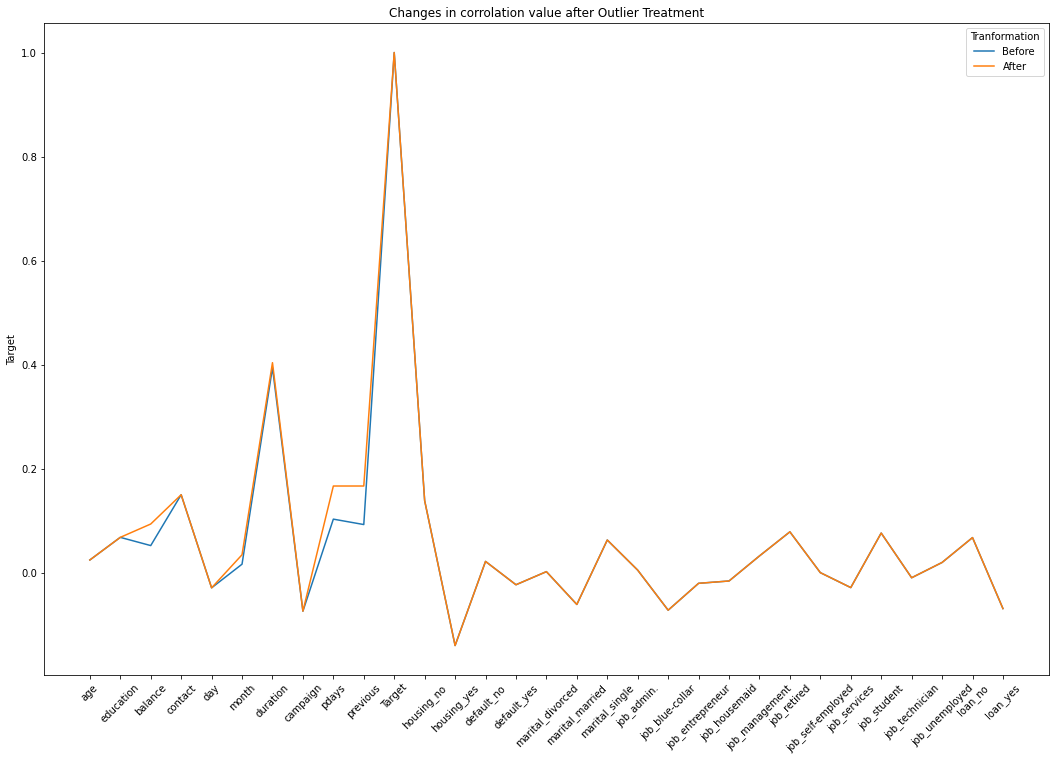

In [46]:
fig, ax = plt.subplots(figsize=(18, 12))

ax = sns.lineplot(data=df, x="index", y=TARGET_COLUMN, hue="Tranformation", ax=ax)
ax.set(title='Changes in corrolation value after Outlier Treatment')
ax.set(xlabel=None)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

In [47]:
# drop features with corrolation of less than 0.05 to the tagert variable
list_of_features_to_drop = main_data.corr()[abs(main_data.corr()[TARGET_COLUMN]) < 0.05].index.to_list()
main_data.drop(list_of_features_to_drop, axis=1, inplace=True)
info(main_data)

45211 Rows x 17 Columns


,Nulls,Non-Nulls,Nulls %,Type
Target,0,45211,0.00%,int64
balance,0,45211,0.00%,int64
campaign,0,45211,0.00%,int64
contact,0,45211,0.00%,int64
duration,0,45211,0.00%,int64
education,0,45211,0.00%,int64
housing_no,0,45211,0.00%,uint8
housing_yes,0,45211,0.00%,uint8
job_blue-collar,0,45211,0.00%,uint8
job_retired,0,45211,0.00%,uint8


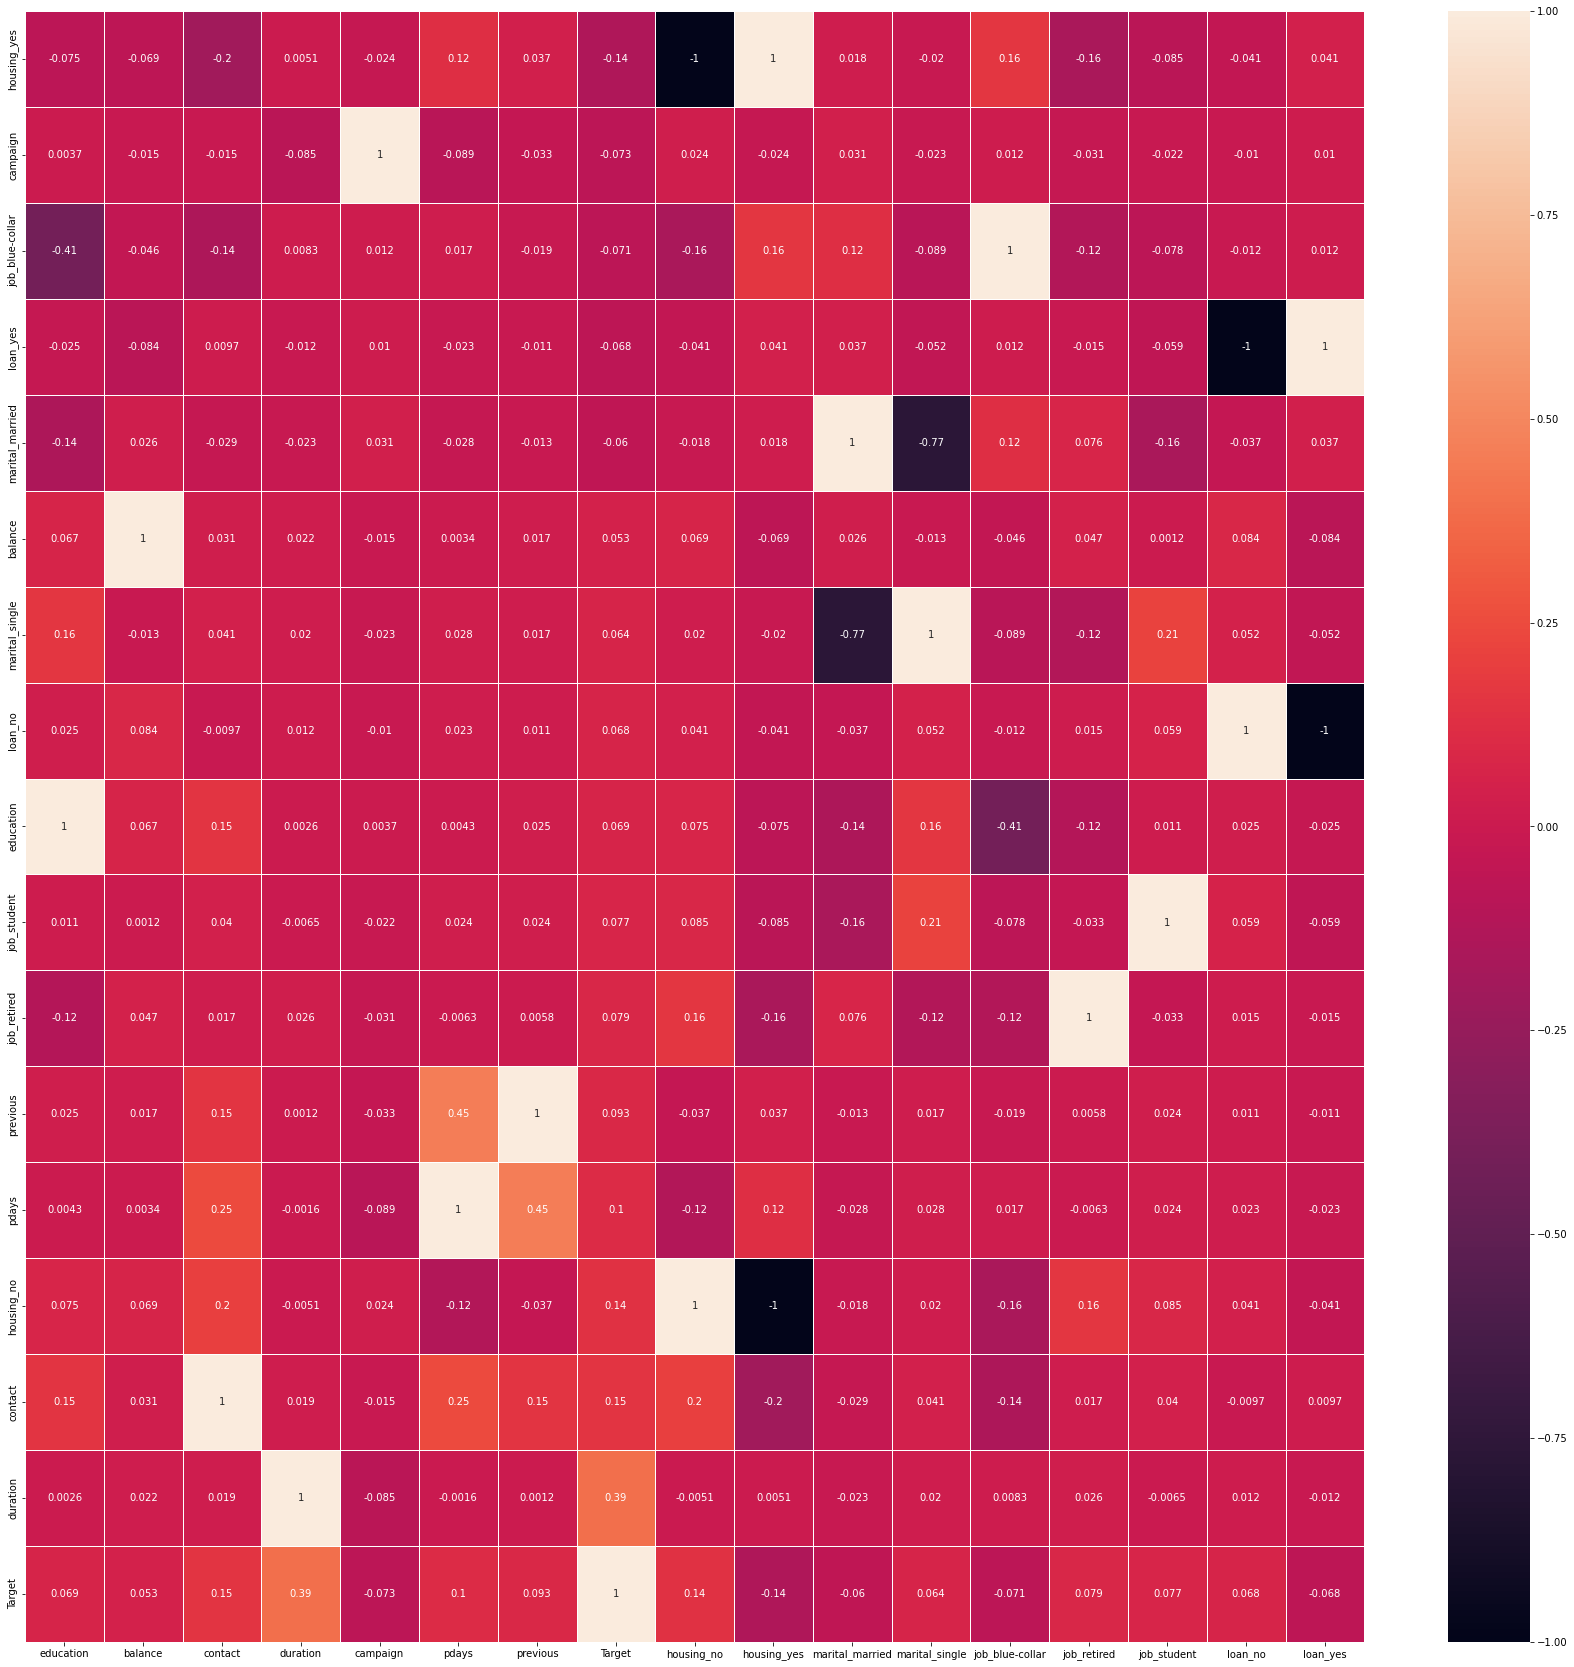

In [48]:
fig, ax = plt.subplots(figsize=(30,30)) 
sns.heatmap(data=main_data.corr().sort_values(by=[TARGET_COLUMN]), annot=True, linewidths=.5, ax=ax)
plt.show()

##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Model building </span>

### Model Perfomace Evaluation Helper Functions

In [49]:
'''
Description:
Given the model, computes models perfomance on test and training data.
Perf metrics displayed are: Accuracy, Recall, F1 Score, and precision.

Input:
model - The learning model.

Returns:
A dictionary containing models perfomace.
'''
def GetMetricsScore(model, x_train_arg, x_test_arg, y_train_arg, y_test_arg):
    
    pred_train = model.predict(x_train_arg)
    pred_test  = model.predict(x_test_arg)
    
    train_accuracy = model.score(x_train_arg, y_train_arg)
    test_accuracy  = model.score(x_test_arg, y_test_arg)
    
    train_recall = metrics.recall_score(y_train_arg, pred_train)
    test_recall  = metrics.recall_score(y_test_arg, pred_test)
    
    train_precision = metrics.precision_score(y_train_arg, pred_train)
    test_precision  = metrics.precision_score(y_test_arg, pred_test)

    f1_score_train = 2 * ((train_precision * train_recall)/(train_precision + train_recall))
    f1_score_test = 2 * ((test_precision * test_recall)/(test_precision + test_recall))
    
    return {
        'Accuracy_Test'   : test_accuracy,
        'Accuracy_Train'  : train_accuracy,
        'Recall_Test'     : test_recall,
        'Recall_Train'    : train_recall,
        'Precision_Test'  : test_precision,
        'Precision_Train' : train_precision,
        'F1_Score_Train'  : f1_score_train,
        'F1_Score_Test'   : f1_score_test
    }

def DisplayConfusionMatrix(model, y_actual, model_name, labels=[1,0]):
    y_predict = model.predict(x_test)
    confusion_matrix = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    confusion_matix_df = pd.DataFrame(
        confusion_matrix,
        index   = [i for i in ["Actual No", "Actual Yes"]],
        columns = [i for i in ["Predicted - No", "Predicted - Yes"]])
    
    group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
    group_percetages = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percetages)]
    labels = np.array(labels).reshape(2, 2)
    plt.figure(figsize= (10,7))
    sns.heatmap(confusion_matix_df, annot=labels,fmt='')
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.title(model_name)

def GetModelsScoreDataFrame(models, x_train_var, x_test_var, y_train_var, y_test_var):
    scores = None
    for model_name in models:
        scores = GetMetricsScore(models[model_name], x_train_var, x_test_var, y_train_var, y_test_var)
        print(f"{model_name}")
    scores_overview_df = pd.DataFrame(columns=scores.keys())

    for model_name in models:
        scores = GetMetricsScore(models[model_name], x_train_var, x_test_var, y_train_var, y_test_var)
        scores_overview_df.loc[model_name] = scores

    return scores_overview_df

def ConfusionMatrixBulkPlot(models, y):
    for clf_model_name in models:
        clf_model = models[clf_model_name]
        DisplayConfusionMatrix(model=clf_model, y_actual=y, model_name = clf_model_name)
        
def DisplayImportanceChart(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(12, 12))
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
    plt.yticks(range(len(indices)), [list(X.columns)[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()


In [50]:
X = main_data.drop(TARGET_COLUMN, axis=1)
Y = main_data.pop(TARGET_COLUMN)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Model building - Bagging:</span>

In [51]:
def BuildAndGetBaggingModels(x_var, y_var):
    bagging_estimator=BaggingClassifier(random_state=1)
    bagging_estimator.fit(x_var, y_var)
    pprint.pprint(bagging_estimator)
    
    rf_estimator=RandomForestClassifier(random_state=1)
    rf_estimator.fit(x_var, y_var)
    pprint.pprint(rf_estimator)

    dtree1 = DecisionTreeClassifier(random_state=1)
    dtree1.fit(x_var, y_var)
    pprint.pprint(dtree1)

    models = {
        'Bagging Classifier'        : bagging_estimator,
        'RandomForest Model'        : rf_estimator,
        'Decision Tree'             : dtree1
    }
    
    return models

In [52]:
models = BuildAndGetBaggingModels(x_train, y_train)
pprint.pprint(models)

BaggingClassifier(random_state=1)
RandomForestClassifier(random_state=1)
DecisionTreeClassifier(random_state=1)
{'Bagging Classifier': BaggingClassifier(random_state=1),
 'Decision Tree': DecisionTreeClassifier(random_state=1),
 'RandomForest Model': RandomForestClassifier(random_state=1)}


In [53]:
results = GetModelsScoreDataFrame(models, x_train, x_test, y_train, y_test)
results.head()

Bagging Classifier
RandomForest Model
Decision Tree


,Accuracy_Test,Accuracy_Train,Recall_Test,Recall_Train,Precision_Test,Precision_Train,F1_Score_Train,F1_Score_Test
Bagging Classifier,0.888012,0.988846,0.320731,0.911129,0.535789,0.992935,0.950275,0.401261
RandomForest Model,0.891035,0.999937,0.351607,0.999460,0.554121,1.000000,0.999730,0.430224
Decision Tree,0.856679,1.000000,0.403277,1.000000,0.390959,1.000000,1.000000,0.397022


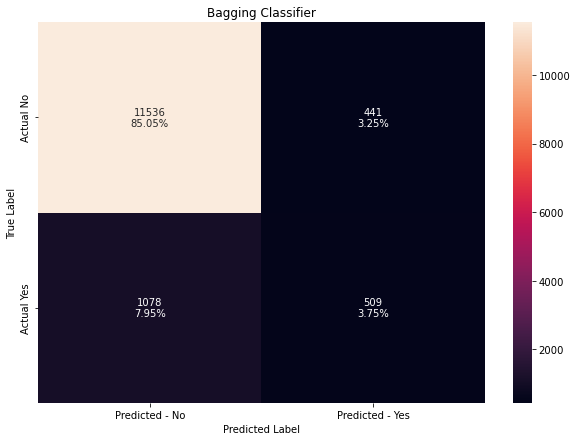

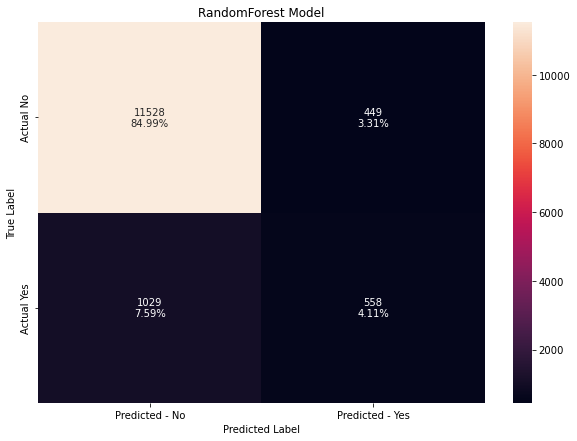

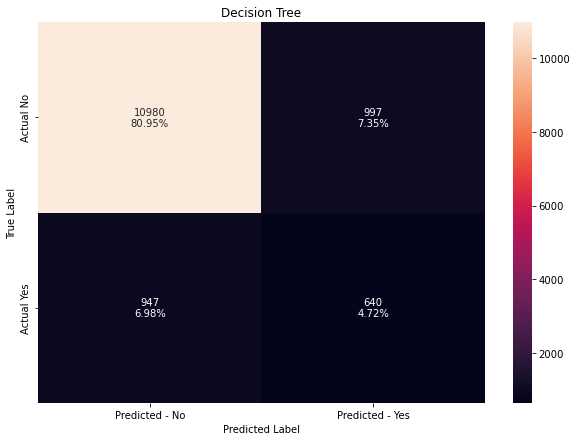

In [54]:
ConfusionMatrixBulkPlot(models, y_test)

##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Model building - Bagging Tuned:</span>

In [ ]:
bagging_estimator=BaggingClassifier(random_state=1)

parameters = {
    'max_samples'  : [0.7, 0.8, 0.9, 1],
    'max_features' : [0.7, 0.8, 0.9, 1],
    'n_estimators' : [10, 20, 30, 40, 50]
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(bagging_estimator, parameters, scoring=acc_scorer, cv=5)
gird_obj = grid_obj.fit(x_train, y_train)

bagging_estimator = grid_obj.best_estimator_
bagging_estimator.fit(x_train, y_train)

In [ ]:
rf_estimator=RandomForestClassifier(random_state=1)

parameters = {
    'class_weight'      : [{0: 0.3, 1: 0.7}],
    'min_samples_leaf'  : np.arange(5, 10),
    'max_features'      : np.arange(0.2,0.7, 0.1),
    'max_samples'       : np.arange(0.3, 0.7, 0.1),
    "n_estimators"      : [100, 150, 200, 250]
}

acc_scorer = metrics.make_scorer(metrics.recall_score)
scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(rf_estimator, parameters, scoring=acc_scorer, cv=5)

gird_obj = grid_obj.fit(x_train,y_train)
rf_estimator = grid_obj.best_estimator_
rf_estimator.fit(x_train,y_train)
DisplayImportanceChart(rf_estimator)

In [ ]:
dtree1 = DecisionTreeClassifier(random_state=1)

parameters = {
    'criterion':['gini','entropy'],
    'max_depth': np.arange(3, 15)
}

acc_scorer = metrics.make_scorer(metrics.recall_score)
scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(dtree1, parameters, scoring=acc_scorer, cv=5)

gird_obj = grid_obj.fit(x_train,y_train)
dtree1 = grid_obj.best_estimator_
dtree1.fit(x_train,y_train)
DisplayImportanceChart(dtree1)

In [ ]:
models = {
    'Bagging Classifier'        : bagging_estimator,
    'RandomForest Model'        : rf_estimator,
    'Decision Tree'             : dtree1
}

In [ ]:
models = BuildAndGetBaggingModels(x_train, y_train)
pprint.pprint(models)

In [ ]:
results = GetModelsScoreDataFrame(models, x_train, x_test, y_train, y_test)
results.head()

##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Model building - Boosting:</span>

In [ ]:
def BuildAndGetBoostingModels(x_var, y_var):
    adaBoosting_Model = AdaBoostClassifier(random_state=1)
    adaBoosting_Model.fit(x_var, y_var)
    pprint.pprint(adaBoosting_Model)

    gradientboost_model = GradientBoostingClassifier(random_state=1)
    gradientboost_model.fit(x_var, y_var)
    pprint.pprint(gradientboost_model)
    
    stacking_model = StackingClassifier()
    stacking_model.fit(x_var, y_var)
    pprint.pprint(stacking_model)
    
    models = {
        'Gradient Boost'            : gradientboost_model,
        'AdaBoostClassifier'        : adaBoosting_Model,
        'Stacking'                  : stacking_model
    }
    
    return models

In [ ]:
models = BuildAndGetBaggingModels(x_train, y_train)
pprint.pprint(models)

In [ ]:
results = GetModelsScoreDataFrame(models, x_train, x_test, y_train, y_test)
results.head()

In [ ]:
ConfusionMatrixBulkPlot(models, y_test)

##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Model building - Boosting Tuned:</span>

In [ ]:
adaBoosting_Model = AdaBoostClassifier(random_state=1)
adaBoosting_Model.fit(x_train, y_train)
pprint.pprint(adaBoosting_Model)

parameters = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

acc_scorer = metrics.make_scorer(metrics.recall_score)
scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = RandomizedSearchCV(
    estimator=adaBoosting_Model,
    param_distributions=parameters,
    n_jobs=-1,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

gird_obj = grid_obj.fit(x_train_over,y_train_over)
adaBoosting_Model = grid_obj.best_estimator_
adaBoosting_Model.fit(x_train_over,y_train_over)

In [ ]:
DisplayImportanceChart(adaBoosting_Model)

In [ ]:
gradientboost_model = GradientBoostingClassifier(random_state=1)
gradientboost_model.fit(x_train, y_train)
pprint.pprint(gradientboost_model)

parameters = {
    "subsample"       : [0.8, 0.9, 1],
    "n_estimators"    : [100, 150, 250],
    "max_features"    : [0.7, 0.8, 0.9, 1]
}


acc_scorer = metrics.make_scorer(metrics.recall_score)
scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = RandomizedSearchCV(
    estimator=gradientboost_model,
    param_distributions=parameters,
    n_jobs=-1,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

gird_obj = grid_obj.fit(x_train_over,y_train_over)
gradientboost_model = grid_obj.best_estimator_
gradientboost_model.fit(x_train_over,y_train_over)

In [ ]:
stacking_model = StackingClassifier()

In [ ]:
models = {
    'Gradient Boost'            : gradientboost_model,
    'AdaBoostClassifier'        : adaBoosting_Model,
    'Stacking'                  : stacking_model
}

In [ ]:
results = GetModelsScoreDataFrame(models, x_train, x_val, y_train, y_val)
results.head()